**Stage 1 EDA**

Name     : Muhammed Abinsaj S

Project Title: In-Vehicle Coupon Recommendation

# DESCRIPTIVE STATISTICS

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
#import dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

#checking dataset info
print('Dataset Info: ')
print(df.info())

#checking missing values in dataset
print('Missing Values: ')
print(df.isna().sum())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                  

In [ ]:
#showing off the whole data
pd.set_option('display.max_columns', None)
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
2             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
3             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
4             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       NaN                  4~8              1~3   
1  never       never       NaN                  4~8              1~3   
2  never       never       NaN                  4~8              1~3   
3  never       never       NaN                  4~8              1~3   
4  never       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Y  
0              1  1  
1              1  0  
2              1  1  
3              1  0  
4              1  0

In [ ]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
for col in df.columns: 
    if df[col].dtype == 'O':
        cat.append(col)
    else: 
        num.append(col)

In [ ]:
df[num].describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [ ]:
df[cat].describe()

destination passanger weather   time        coupon expiration  \
count             12684     12684   12684  12684         12684      12684   
unique                3         4       3      5             5          2   
top     No Urgent Place     Alone   Sunny    6PM  Coffee House         1d   
freq               6283      7305   10069   3230          3996       7091   

        gender    age    maritalStatus                 education  occupation  \
count    12684  12684            12684                     12684       12684   
unique       2      8                5                         6          25   
top     Female     21  Married partner  Some college - no degree  Unemployed   
freq      6511   2653             5100                      4351        1870   

                 income                     car    Bar CoffeeHouse CarryAway  \
count             12684                     108  12577       12467     12533   
unique                9                       5      5           5         5   
top     $25000 - $37499  Scooter and motorcycle  never       less1       1~3   
freq               2013                      22   5197        3385      4672   

       RestaurantLessThan20 Restaurant20To50  
count                 12554            12495  
unique                    5                5  
top                     1~3            less1  
freq                   5376             6077

In [ ]:
#checking unique value
print(df['passanger'].value_counts())
print(df['age'].value_counts())
print(df['income'].value_counts())

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


*Question*

1. Are there any columns with inappropriate data types or column names and contents that don't match?

The temperature column is more suitable to be changed into object dtypes because it has an ordinal data type. The age and occupation columns have too many values, they can be summarized into just a few classifications.

2. Are there any columns that have blank values? If so, what are they?

Blank values are found in the columns Car(99.14%), Bar(0.84%), CoffeeHouse(1.71%), CarryAway(1.19%), RestaurantLessThan20(1.02%) and Restaurant20to50(1.49%).

3. Are there any columns that have somewhat odd summary values? (min/mean/median/max/unique/top/freq)?

The direction_same column has a low mean value and direction_opp has a high mean value, this can be caused by the many coupon destination scenarios being in the opposite position to the driver's position and their values ​​having the same context. The toCoupon_GEQ5min column only has 1 unique value.

# UNIVARIATE ANALYSIS

In [ ]:
num

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

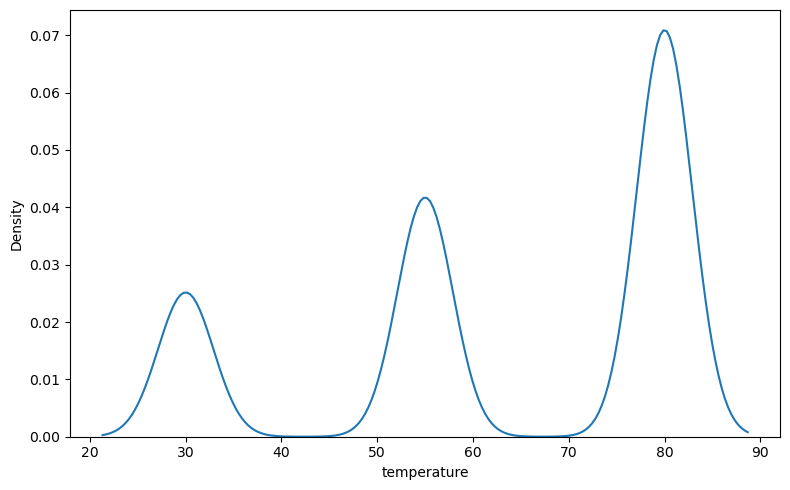

In [ ]:
plt.figure(figsize= (8, 5))
sns.kdeplot(x = df['temperature'])
#plt.savefig('ua.png')
plt.tight_layout()

1. The temperature feature has a trimodal distribution, this is because the value in this feature is categorical so that the data distribution is collected on the 3 unique values.

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

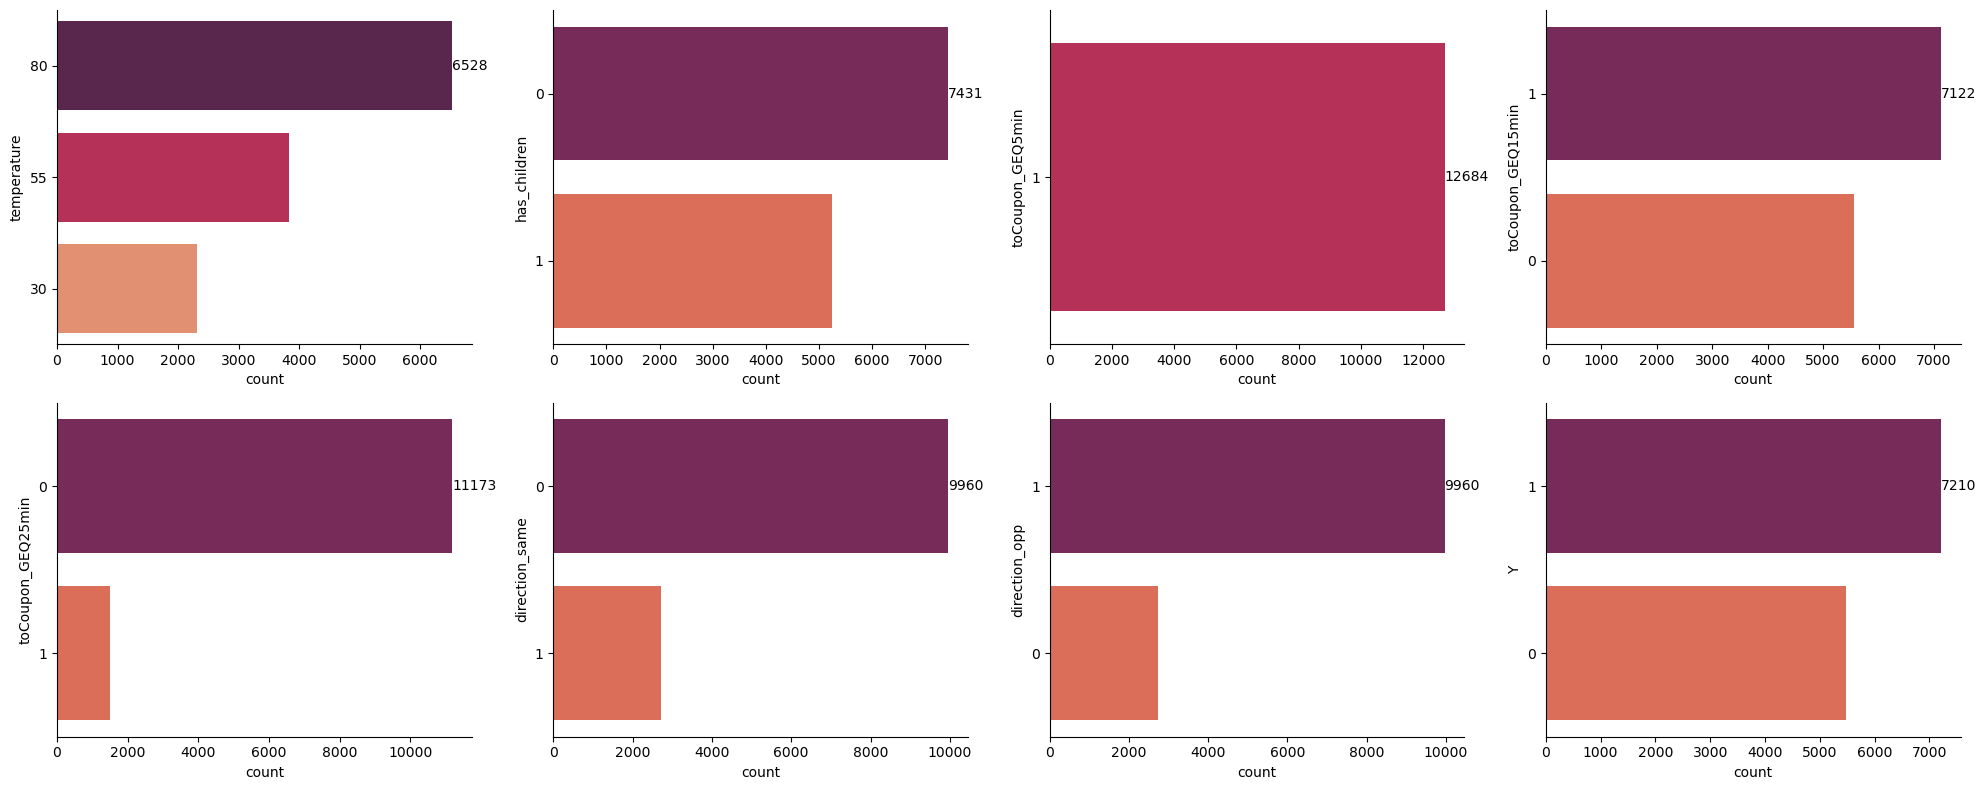

In [ ]:
plt.figure(figsize=(20,8))
for i in range(len(num)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar_num.png')

2. The toCoupon_GEQ5min feature only has 1 unique value. Because it is considered that this feature cannot provide insight, it will be dropped at the pre-processing stage.

3. The direction_opp feature needs to be dropped during data pre-processing because this feature has the same value as the direction_same feature, so only one of them is needed.

In [ ]:
cat

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

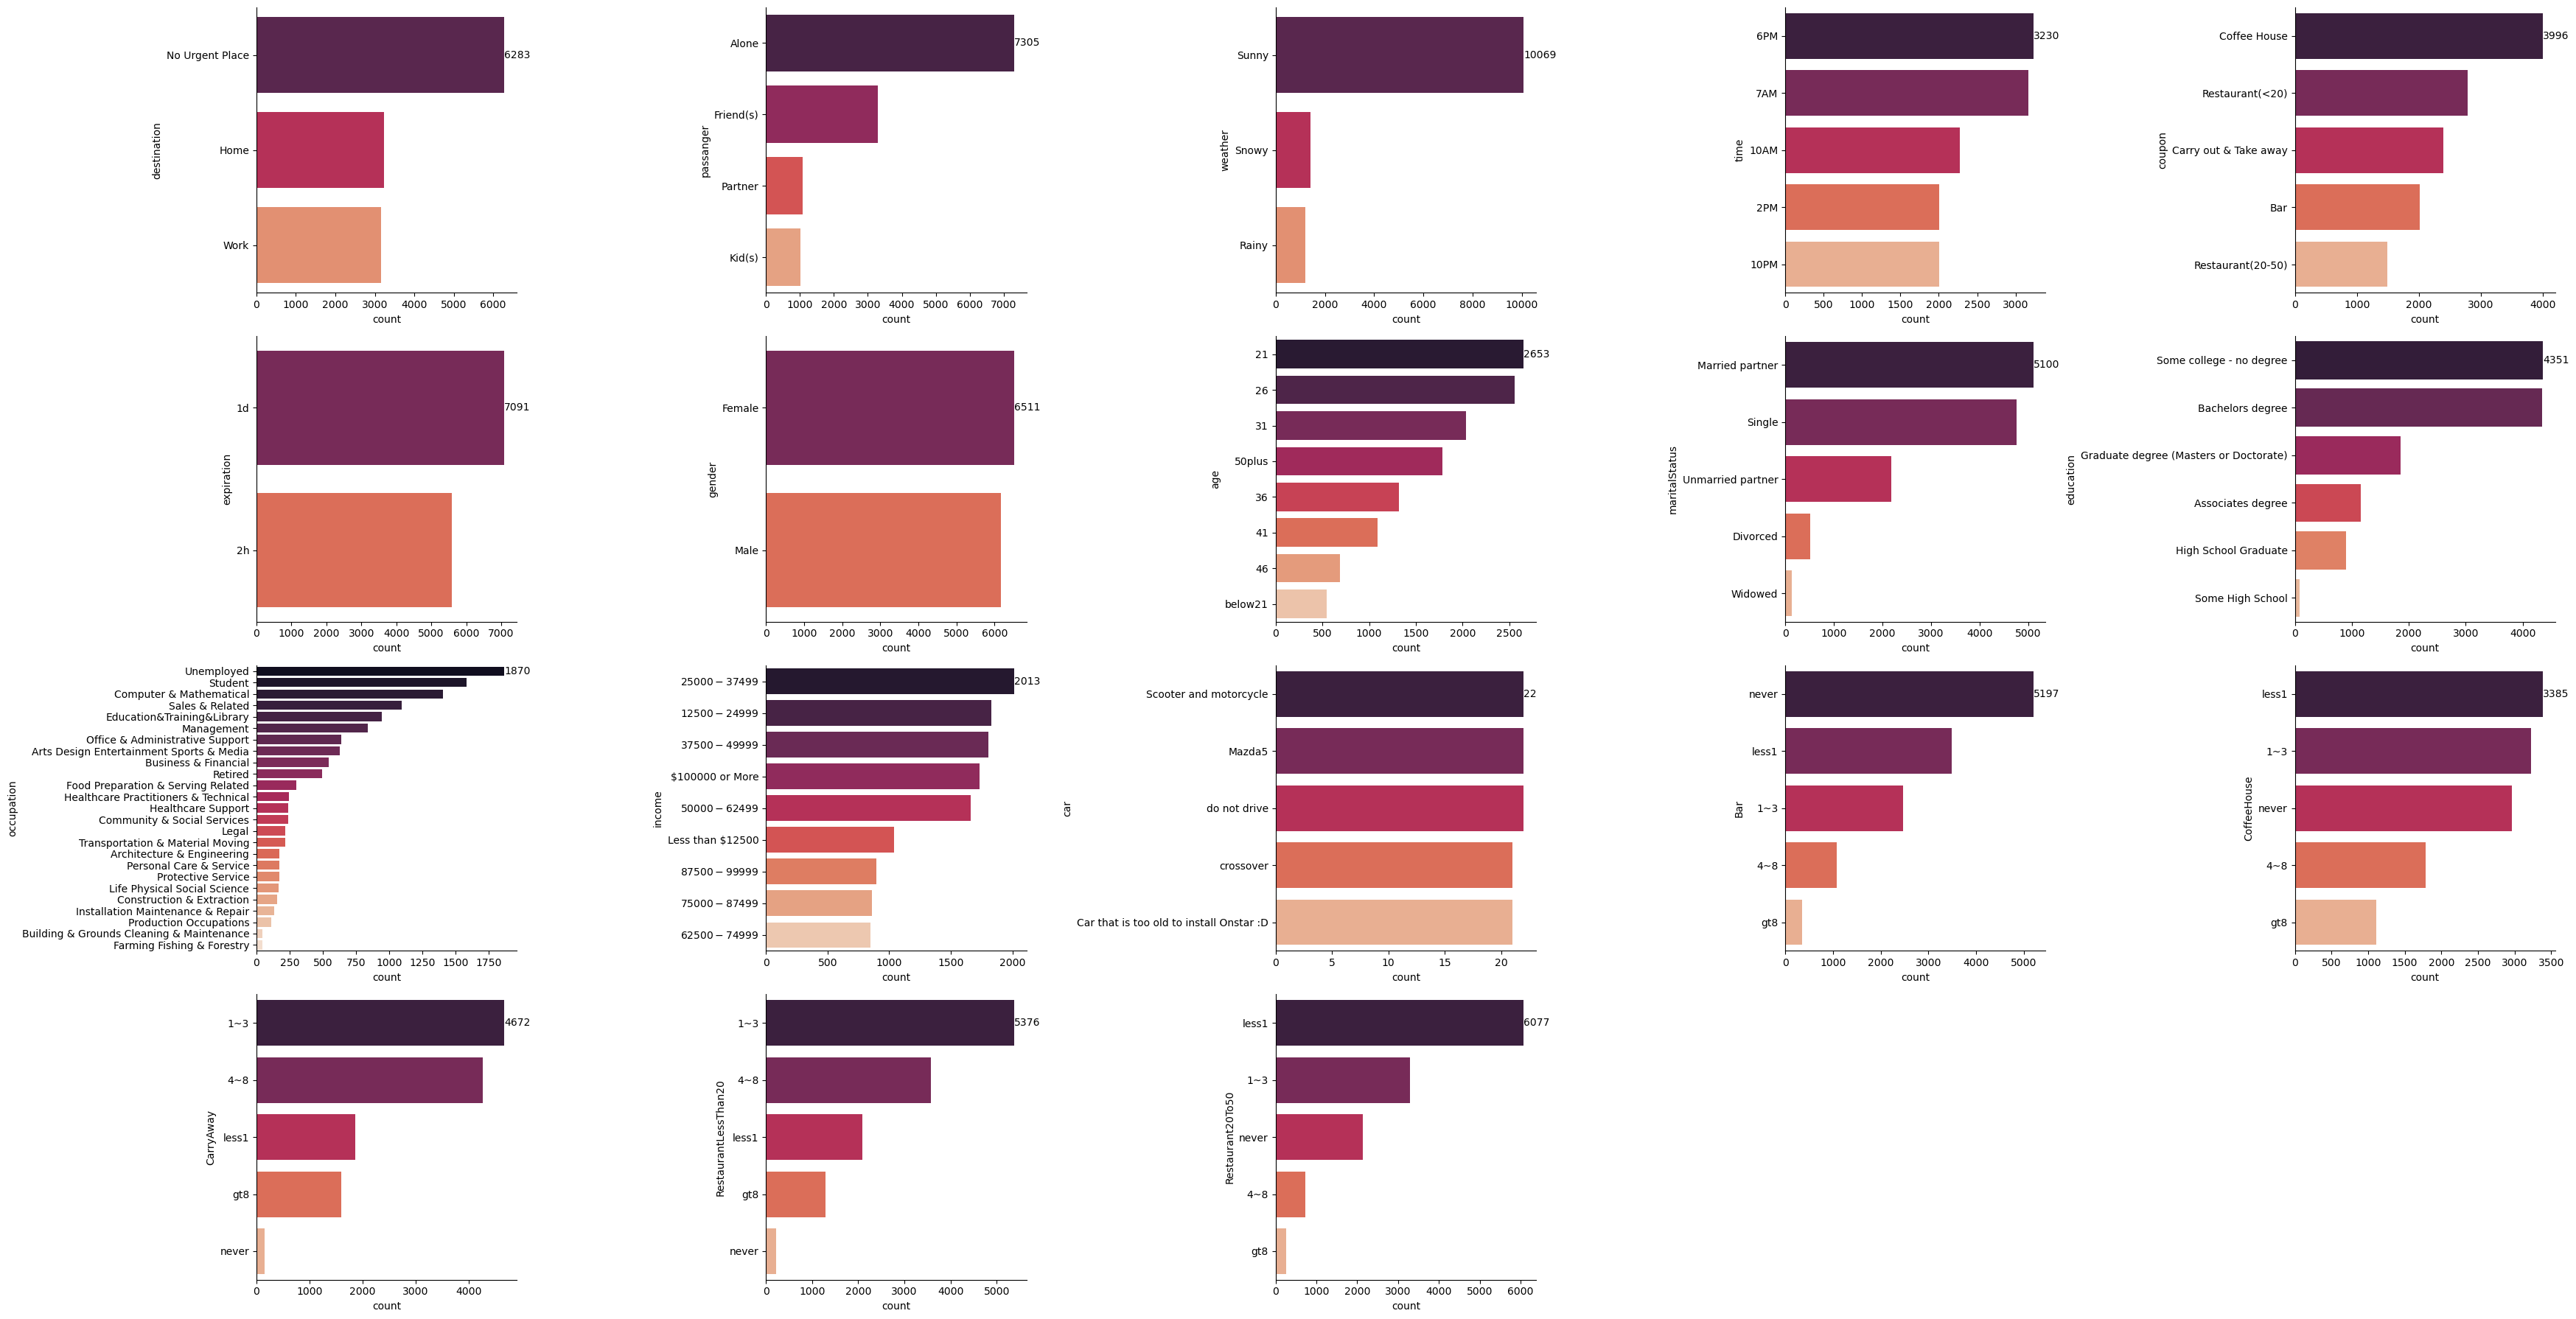

In [ ]:
plt.figure(figsize=(35,18))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='rocket', order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar.png')

4. The occupation feature has too many categories, it is necessary to summarize the categories during data pre-processing. The occupation feature is dominated by the unemployed category.

5. Age features can be summarized into categories during data pre-processing.

6. The car feature has too many missing values, so it needs to be dropped during data pre-processing.

7. The destination feature is dominated by 'No Urgent Place', the passenger feature is dominated by 'Alone', the weather feature is dominated by 'Sunny', the bar feature is dominated by 'never', the RestaurantLessThan20 feature is dominated by '1~3', the Restaurant20to50 feature is dominated by 'less1', the coupon feature is dominated by CoffeeHouse.




# MULTIVARIATE ANALYSIS

In [ ]:
#import dataset as dummy
df_dummy = pd.read_csv("in-vehicle-coupon-recommendation.csv")
pd.set_option('display.max_columns', None)
df_dummy.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
2             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
3             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
4             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       NaN                  4~8              1~3   
1  never       never       NaN                  4~8              1~3   
2  never       never       NaN                  4~8              1~3   
3  never       never       NaN                  4~8              1~3   
4  never       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Y  
0              1  1  
1              1  0  
2              1  1  
3              1  0  
4              1  0

In [ ]:
df_dummy = df_dummy.drop(columns='car')

In [ ]:
#checking age unique value
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [ ]:
#categorize it to be more simple
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df_dummy['age'] = age_list

In [ ]:
#checking new age unique value
df_dummy['age'].value_counts()

age
21-30    5212
31-40    3358
>50      1788
41-50    1779
<21       547
Name: count, dtype: int64

In [ ]:
#checking occupation unique value
df['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [ ]:
#categorize it to be more simple
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df_dummy['occupation'] = occupation_list

In [ ]:
#checking new occupation unique value
df_dummy['occupation'].value_counts()

Professionals        5000
Unemployed           1870
Student              1584
Service and sales    1443
Technicians           807
Others                792
Crafts                693
Retired               495
Name: occupation, dtype: int64

In [ ]:
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [ ]:
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [ ]:
#label encoding proccess
df_ma = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2}})
df_ma.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny            1   2PM   
1  No Urgent Place  Friend(s)   Sunny            2  10AM   
2  No Urgent Place  Friend(s)   Sunny            2  10AM   
3  No Urgent Place  Friend(s)   Sunny            2   2PM   
4  No Urgent Place  Friend(s)   Sunny            2   2PM   

                  coupon  expiration  gender  age      maritalStatus  \
0        Restaurant(<20)           1       1    1  Unmarried partner   
1           Coffee House           0       1    1  Unmarried partner   
2  Carry out & Take away           0       1    1  Unmarried partner   
3           Coffee House           0       1    1  Unmarried partner   
4           Coffee House           1       1    1  Unmarried partner   

   has_children  education  occupation           income  Bar  CoffeeHouse  \
0             1          2  Unemployed  $37500 - $49999  0.0          0.0   
1             1          2  Unemployed  $37500 - $49999  0.0          0.0   
2             1          2  Unemployed  $37500 - $49999  0.0          0.0   
3             1          2  Unemployed  $37500 - $49999  0.0          0.0   
4             1          2  Unemployed  $37500 - $49999  0.0          0.0   

   CarryAway  RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
0        NaN                   3.0               2.0                 1   
1        NaN                   3.0               2.0                 1   
2        NaN                   3.0               2.0                 1   
3        NaN                   3.0               2.0                 1   
4        NaN                   3.0               2.0                 1   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y  
0                  0                  0               0              1  1  
1                  0                  0               0              1  0  
2                  1                  0               0              1  1  
3                  1                  0               0              1  0  
4                  1                  0               0              1  0

In [ ]:
obj_df_ma = df_ma.select_dtypes(include=['object']).copy()
obj_df_ma.head()

destination  passanger weather  time                 coupon  \
0  No Urgent Place      Alone   Sunny   2PM        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny  10AM           Coffee House   
2  No Urgent Place  Friend(s)   Sunny  10AM  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny   2PM           Coffee House   
4  No Urgent Place  Friend(s)   Sunny   2PM           Coffee House   

       maritalStatus  occupation           income  
0  Unmarried partner  Unemployed  $37500 - $49999  
1  Unmarried partner  Unemployed  $37500 - $49999  
2  Unmarried partner  Unemployed  $37500 - $49999  
3  Unmarried partner  Unemployed  $37500 - $49999  
4  Unmarried partner  Unemployed  $37500 - $49999

In [ ]:
df_ma = df_ma.drop(['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'], axis=1)

In [ ]:
obj_df_ma_1 = obj_df_ma.astype('category')
obj_df_ma_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   destination    12684 non-null  category
 1   passanger      12684 non-null  category
 2   weather        12684 non-null  category
 3   time           12684 non-null  category
 4   coupon         12684 non-null  category
 5   maritalStatus  12684 non-null  category
 6   occupation     12684 non-null  category
 7   income         12684 non-null  category
dtypes: category(8)
memory usage: 101.0 KB


In [ ]:
obj_df_ma_1['destination'] = obj_df_ma_1['destination'].cat.codes
obj_df_ma_1['passanger'] = obj_df_ma_1['passanger'].cat.codes
obj_df_ma_1['weather'] = obj_df_ma_1['weather'].cat.codes
obj_df_ma_1['time'] = obj_df_ma_1['time'].cat.codes
obj_df_ma_1['coupon'] = obj_df_ma_1['coupon'].cat.codes
obj_df_ma_1['maritalStatus'] = obj_df_ma_1['maritalStatus'].cat.codes
obj_df_ma_1['occupation'] = obj_df_ma_1['occupation'].cat.codes
obj_df_ma_1['income'] = obj_df_ma_1['income'].cat.codes
obj_df_ma_1.head()

destination  passanger  weather  time  coupon  maritalStatus  occupation  \
0            1          0        2     2       4              3           7   
1            1          1        2     0       2              3           7   
2            1          1        2     0       1              3           7   
3            1          1        2     2       2              3           7   
4            1          1        2     2       2              3           7   

   income  
0       3  
1       3  
2       3  
3       3  
4       3

In [ ]:
df_final_2 = pd.concat([df_ma, obj_df_ma_1], axis=1)
df_final_2 = df_final_2[['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income', 'temperature', 'expiration', 'gender', 'age', 'has_children',
            'education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
            'direction_same', 'direction_opp', 'Y']]

In [ ]:
df_final_2['destination'].value_counts()

1    6283
0    3237
2    3164
Name: destination, dtype: int64

In [ ]:
df_ma_final = pd.get_dummies(df_ma, columns=['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'],
            prefix=['dest', 'pass', 'weather', 'time', 'coupon', 'marital', 'occup', 'income'])
df_ma_final.head()

temperature  expiration  gender  age  has_children  education  Bar  \
0            1           1       1    1             1          2  0.0   
1            2           0       1    1             1          2  0.0   
2            2           0       1    1             1          2  0.0   
3            2           0       1    1             1          2  0.0   
4            2           1       1    1             1          2  0.0   

   CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  \
0          0.0        NaN                   3.0               2.0   
1          0.0        NaN                   3.0               2.0   
2          0.0        NaN                   3.0               2.0   
3          0.0        NaN                   3.0               2.0   
4          0.0        NaN                   3.0               2.0   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Y  dest_Home  dest_No Urgent Place  dest_Work  pass_Alone  \
0              1  1          0                     1          0           1   
1              1  0          0                     1          0           0   
2              1  1          0                     1          0           0   
3              1  0          0                     1          0           0   
4              1  0          0                     1          0           0   

   pass_Friend(s)  pass_Kid(s)  pass_Partner  weather_Rainy  weather_Snowy  \
0               0            0             0              0              0   
1               1            0             0              0              0   
2               1            0             0              0              0   
3               1            0             0              0              0   
4               1            0             0              0              0   

   weather_Sunny  time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
0              1          0          0         1         0         0   
1              1          1          0         0         0         0   
2              1          1          0         0         0         0   
3              1          0          0         1         0         0   
4              1          0          0         1         0         0   

   coupon_Bar  coupon_Carry out & Take away  coupon_Coffee House  \
0           0                             0                    0   
1           0                             0                    1   
2           0                             1                    0   
3           0                             0                    1   
4           0                             0                    1   

   coupon_Restaurant(20-50)  coupon_Restaurant(<20)  marital_Divorced  \
0                         0                       1                 0   
1                         0                       0                 0   
2                         0                       0                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   marital_Married partner  marital_Single  marital_Unmarried partner  \
0                        0               0                          1   
1                        0               0                          1   
2                        0               0                          1   
3                        0               0                          1   
4                        0               0                          1   

   marital_Widowed  oc

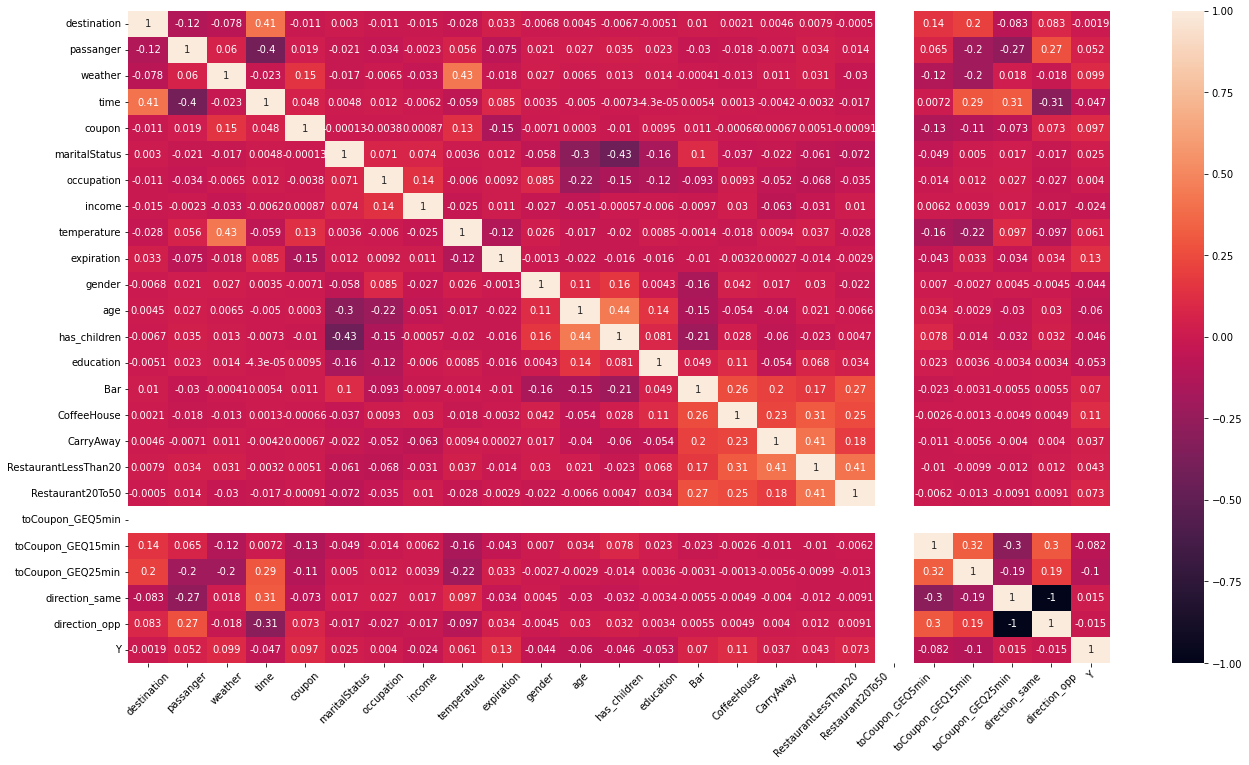

In [ ]:
plt.figure(figsize = (22,12))
sns.heatmap(df_final_2.corr(), annot=True)
plt.xticks(rotation=45)
plt.savefig('ma.png')
plt.show()


A. Based on the results of the correlation calculations, the relevant feature columns are:

1. Passanger
2. Time
3. Weather
4. Coupon
5. Temperature
6. Expiration
7. Age
8. Education
8. Bar
9. CoffeeHouse
10. Carry Away
11. RestauranLessThan 20
12. Restaurant 20 To 50
13. direction_same
14. toCoupon_GEQ 15 min
15. toCoupon_GEQ 25 min

B. There are features that are considered to have a correlation with the target but based on the correlation calculation, the value is very small, such as destination, time, direction_same. The estimation so far is because these features are not suitable for label encoding because the data type in these features is not ordinal/2 unique values.


C. In addition, other features that are considered to have a correlation with the target but based on the correlation calculation, the value is very small, such as CarryAway and RestaurantLessThan 20. The estimate so far is because these features still have missing values ​​when the correlation calculation is carried out so that the value is smaller than it should be.

D. The direction_same feature has a perfect correlation value with direction_opp, this strengthens the original purpose of dropping one of them so as not to cause multicollinearity.

In [ ]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [ ]:
def df_group(col):
    dfg = df.groupby([col, 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
    dfg_sum = df.groupby(col).agg({'toCoupon_GEQ5min':'count'})
    dfg = dfg.merge(dfg_sum, on = col)
    dfg.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
    dfg['percentage'] = round((dfg['customers']/dfg['total_customer']) * 100, 2)
    return dfg

def barplot(col):
    df1 = df_group(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'customers', hue = 'Y', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Y', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def continousplot(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Y', y = col, data = df, ax = ax[0])
    sns.histplot(x = col, hue = 'Y', data = df, ax = ax[1])

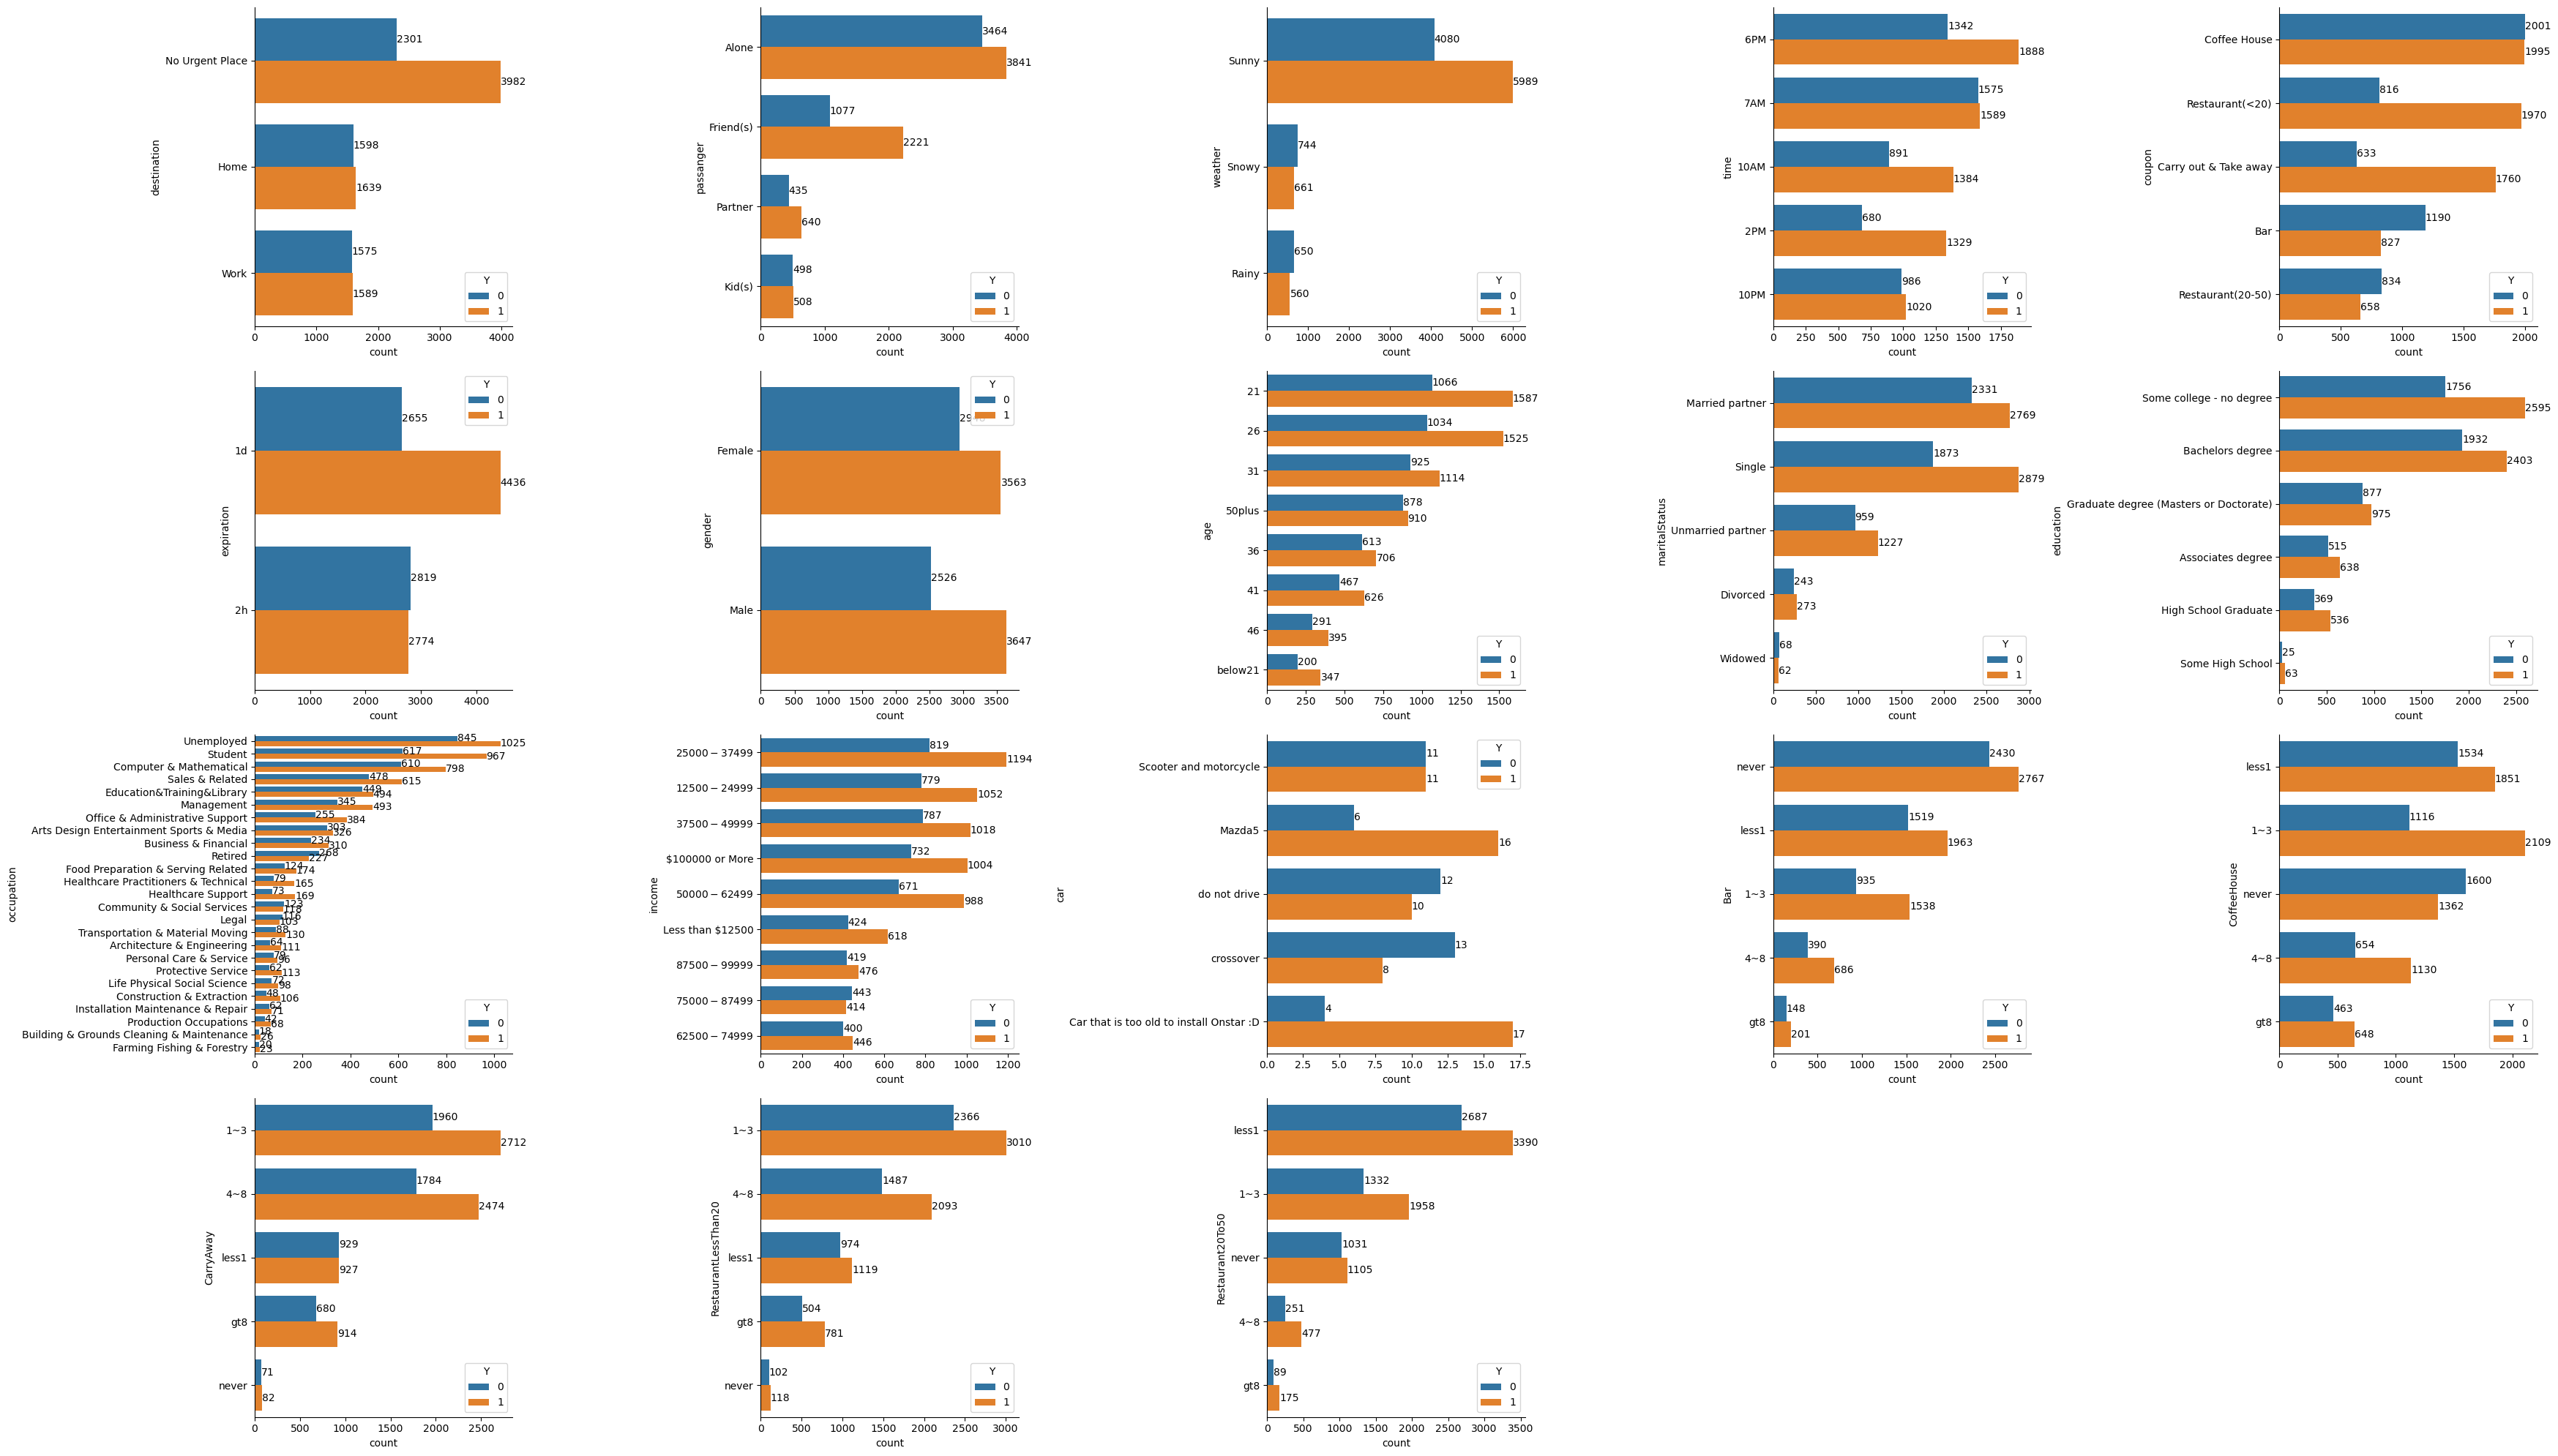

In [ ]:
plt.figure(figsize = (35,20))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y = cat[i], hue = 'Y', data = df, order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    sns.despine()
plt.tight_layout()
plt.savefig('ma_bar.png')

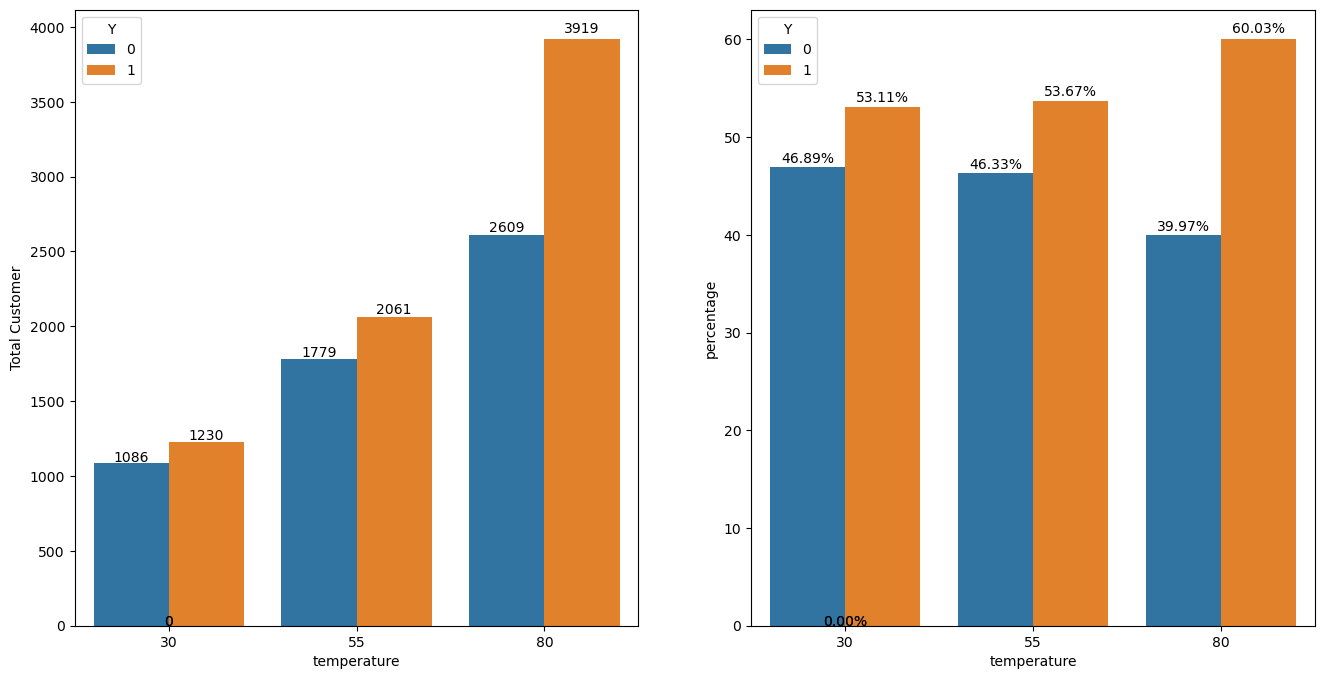

In [ ]:
barplot('temperature')

In the "destination" feature, it appears that the riders who receive the most coupons are riders with the destination "No Urgent Place" while the destinations "home" and "work" have lower equivalent values. 

In the "weather" feature, it is known that coupons are most widely received by riders in "sunny" weather conditions compared to "snowy" and "rainy". 

It is known that the "time" for receiving the most coupons is at "10AM", "2PM" and "6PM" compared to other times. 

It is known that in the "coupon type" feature, the coupons most widely received by riders are the "RestaurantLessThan20" and "carry out and take away" coupon types. 

In the "expiration" feature, coupons are more often chosen in the "1d" expiration category than "2h". 

In the "marital status" feature, coupon recipients are dominated by riders with the status "single" and "marriage couple". 

At the "education" level, it can be seen that the largest number of recipients are from "college non-degree" and "bachelor" educational statuses.

# BUSINESS INSIGHT

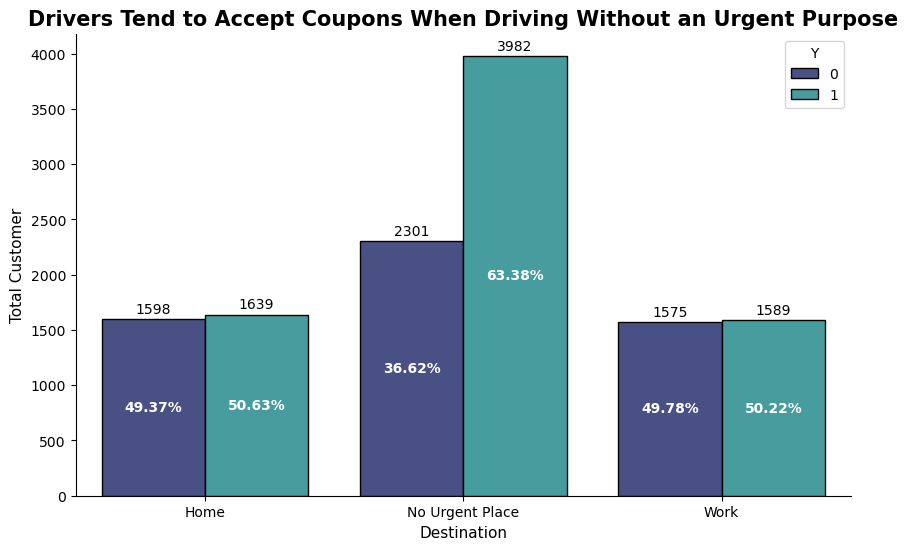

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Drivers Tend to Accept Coupons When Driving Without an Urgent Purpose", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_group('destination'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.37%', '36.62%', '49.78%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.63%', '63.38%', '50.22%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('destination.png')
plt.show()

The number of driver customers who received coupons was much higher when they did not have a specific destination when driving (3,982). The coupon acceptance ratio was also the highest (63.38%) compared to the others. This is because there is no urgency when driving, meaning that the target driver customers have more free time to visit the coupon location to use, so the acceptance rate is higher than the others.

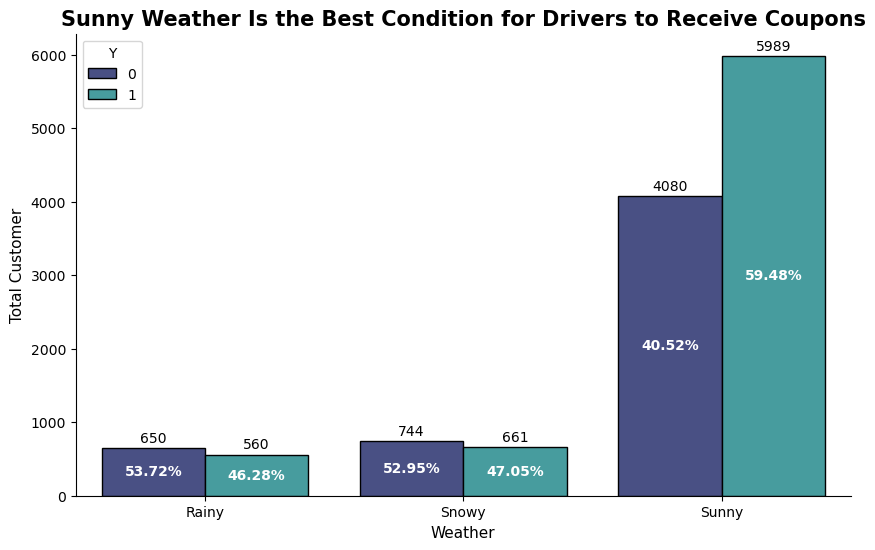

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Sunny Weather Is the Best Condition for Drivers to Receive Coupons", fontsize=15, color='black', weight='bold')
sns.barplot(x='weather', y='customers', data=df_group('weather'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Weather', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['53.72%', '52.95%', '40.52%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['46.28%', '47.05%', '59.48%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('weather.png')
plt.show()

The number of driver customers who received coupons was much higher when the weather was sunny (10.0970), in addition, the ratio of those who received coupons was also the highest (59.48%) compared to other weather conditions. This could be because not many driver customers leave the house to do activities when the weather is rainy or snowy. Therefore, it is highly recommended that coupon campaigns be held in the summer/spring. Avoid holding coupon campaigns during the snowy season.

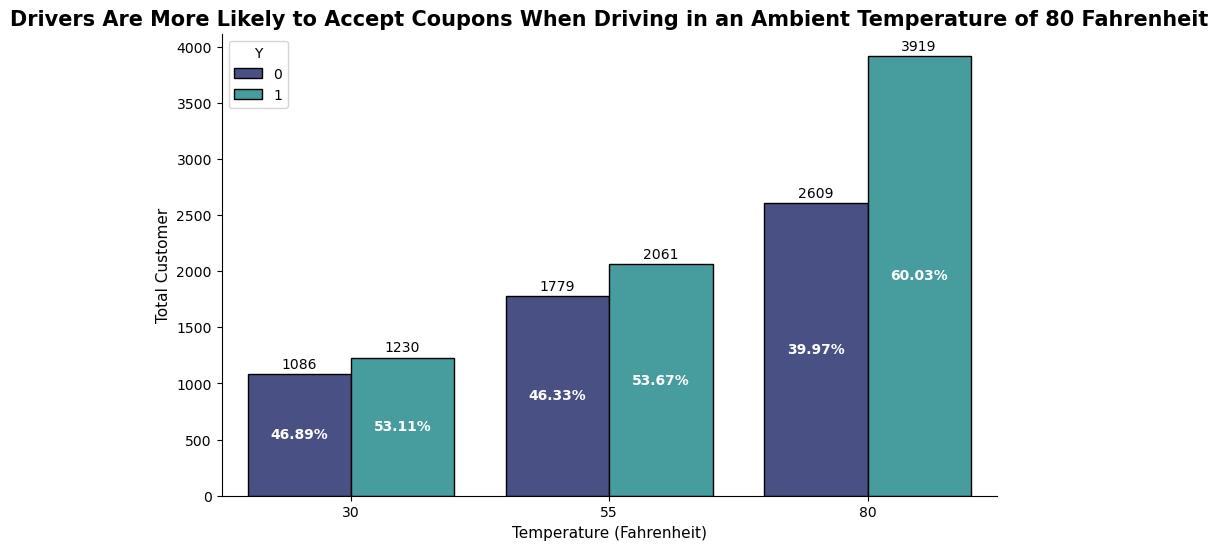

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Drivers Are More Likely to Accept Coupons When Driving in an Ambient Temperature of 80 Fahrenheit", fontsize=15, color='black', weight='bold')
sns.barplot(x='temperature', y='customers', data=df_group('temperature'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Temperature (Fahrenheit)', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['46.89%', '46.33%', '39.97%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['53.11%', '53.67%', '60.03%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('temperature.png')
plt.show()

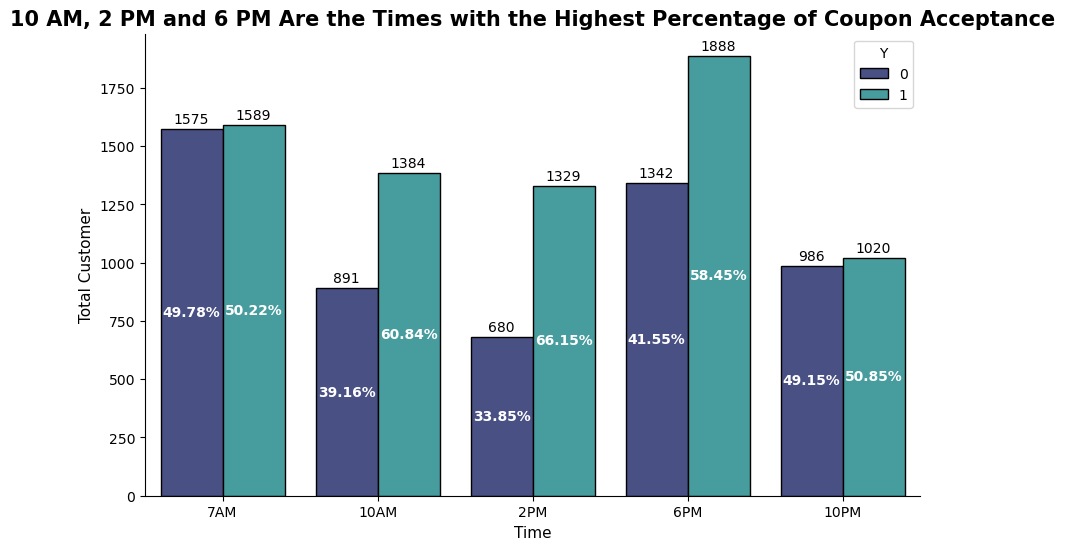

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("10 AM, 2 PM and 6 PM Are the Times with the Highest Percentage of Coupon Acceptance", fontsize=15, color='black', weight='bold')
sns.barplot(x='time', y='customers', data=df_group('time'), hue='Y', order=['7AM', '10AM', '2PM', '6PM', '10PM'], edgecolor='black', palette='mako')

plt.xlabel('Time', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.78%', '39.16%', '33.85%', '41.55%', '49.15%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.22%', '60.84%', '66.15%', '58.45%', '50.85%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('time_png')
plt.show()

In [ ]:
df_6pm = df[df['time'] == '6PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_6pm_sum = df_6pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_6pm = df_6pm.merge(df_6pm_sum, on = 'destination')
df_6pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_6pm['percentage'] = round((df_6pm['customers']/df_6pm['total_customer']) * 100, 2)
df_6pm

destination  Y  customers  total_customer  percentage
0             Home  0        969            2123       45.64
1             Home  1       1154            2123       54.36
2  No Urgent Place  0        373            1107       33.69
3  No Urgent Place  1        734            1107       66.31

In [ ]:
df_10am = df[df['time'] == '10AM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_10am_sum = df_10am.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_10am = df_10am.merge(df_10am_sum, on = 'destination')
df_10am.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_10am['percentage'] = round((df_10am['customers']/df_10am['total_customer']) * 100, 2)
df_10am

destination  Y  customers  total_customer  percentage
0  No Urgent Place  0        891            2275       39.16
1  No Urgent Place  1       1384            2275       60.84

In [ ]:
df_2pm = df[df['time'] == '2PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_2pm_sum = df_2pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_2pm = df_2pm.merge(df_2pm_sum, on = 'destination')
df_2pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_2pm['percentage'] = round((df_2pm['customers']/df_2pm['total_customer']) * 100, 2)
df_2pm

destination  Y  customers  total_customer  percentage
0  No Urgent Place  0        680            2009       33.85
1  No Urgent Place  1       1329            2009       66.15

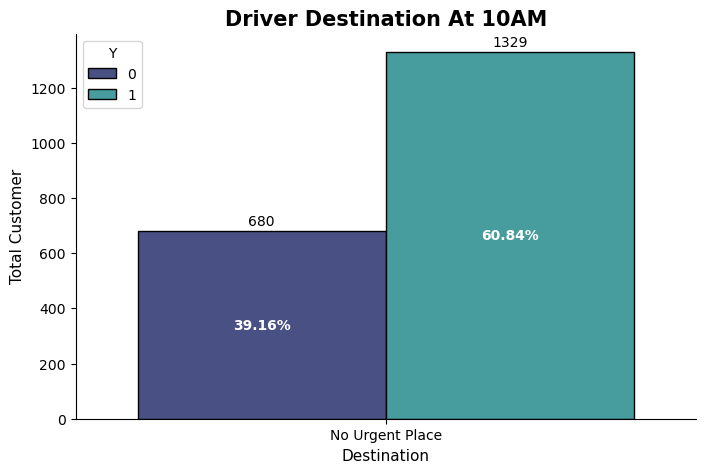

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 10AM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['39.16%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['60.84%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('10am.png')
plt.show()

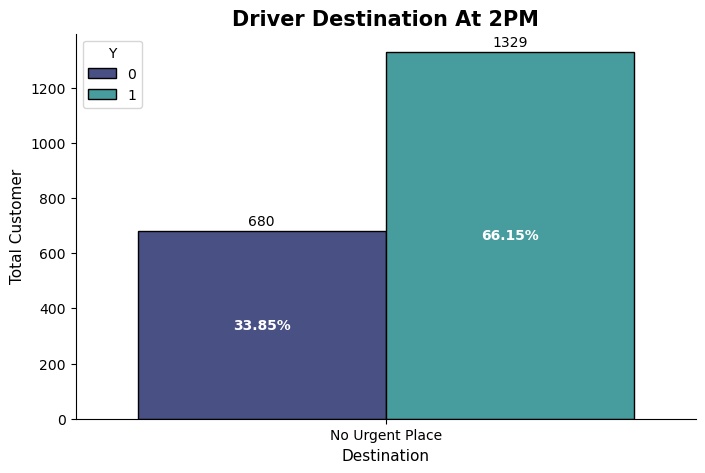

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 2PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['33.85%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['66.15%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('2pm.png')
plt.show()

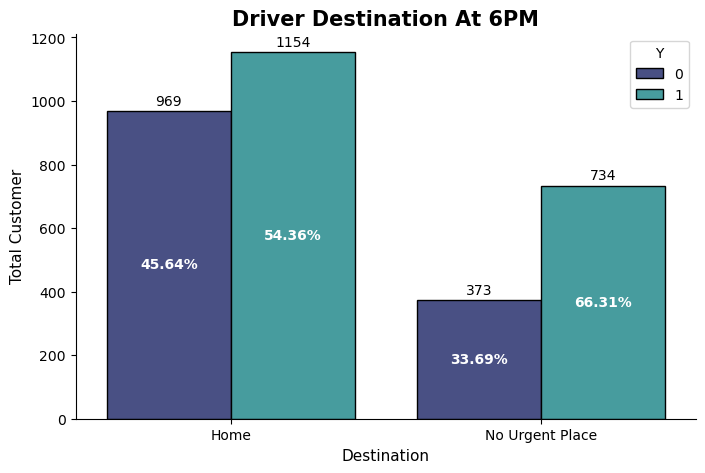

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 6PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_6pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['45.64%', '33.69%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['54.36%', '66.31%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('6pm.png')
plt.show()

The number of driver customers who received coupons was high at 10 AM (1,384), 2 PM (1,329) and 6 PM (1,888). After further analysis, it turned out that this was caused by the driver customer destinations at those hours being only 2, namely no urgent destinations and home. At 10 AM and 2 PM, all driver customers did not have urgent destinations. The coupon acceptance ratio was also high, namely (60.84%) and (66.15%). Then, at 6 PM, the driver customer destinations consisted of no urgent destinations and home. Even so, the coupon acceptance ratio remained high (54.36%) and (66.31%). This could be due to the situation of driver customers when driving home while looking for food for home. 

Based on the destination and time variables, it is highly recommended that coupons be given massively at 10 AM, 2 PM and 6 PM. Because the driver customer destinations at 6 PM are home, giving CarryAway coupons is the right step.

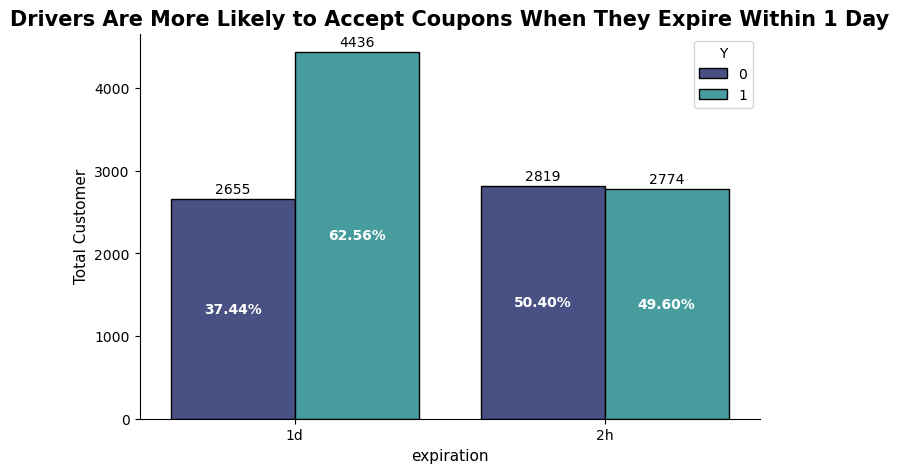

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Drivers Are More Likely to Accept Coupons When They Expire Within 1 Day", fontsize=15, color='black', weight='bold')
sns.barplot(x='expiration', y='customers', data=df_group('expiration'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('expiration', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['37.44%', '50.40%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['62.56%', '49.60%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('expiration.png')
plt.show()

Driver customers who received coupons with a validity period of 1 day had a ratio of 62.56%. While driver customers who received coupons with a validity period of 2 hours were only 49.60%. This may be because not all driver customers think about using coupons as soon as possible because there are considerations of driving location activities, coupon usage locations, etc. Therefore, it is highly recommended that coupons that will be given to driver customers are coupons that still have a validity period of 1 day and avoid giving coupons that have a short validity period.

# Data Cleansing

**Handle Missing Values**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [ ]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
df.shape

(12684, 26)

In [ ]:
#drop unnecessary column
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

In [ ]:
df[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].describe()

Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
count   12577       12467     12533                12554            12495
unique      5           5         5                    5                5
top     never       less1       1~3                  1~3            less1
freq     5197        3385      4672                 5376             6077

In [ ]:
#imputation using mode or most frequent value
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

**Handle Duplicated Data**

In [ ]:
df.duplicated().sum()

74

In [ ]:
df = df.drop_duplicates()

Duplicated data is dropped/deleted, this is done so that the row variation is high so that the train data for the machine learning model is more accurate.

**Handle Outliers**

In [ ]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

destination passanger weather   temperature   time        coupon  \
count             12610     12610   12610  12610.000000  12610         12610   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6266      7248   10011           NaN   3220          3989   
mean                NaN       NaN     NaN     63.267248    NaN           NaN   
std                 NaN       NaN     NaN     19.153386    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration  gender    age    maritalStatus  has_children  \
count       12610   12610  12610            12610  12610.000000   
unique          2       2      8                5           NaN   
top            1d  Female     21  Married partner           NaN   
freq         7031    6469   2642             5068           NaN   
mean          NaN     NaN    NaN              NaN      0.414512   
std           NaN     NaN    NaN              NaN      0.492657   
min           NaN     NaN    NaN              NaN      0.000000   
25%           NaN     NaN    NaN              NaN      0.000000   
50%           NaN     NaN    NaN              NaN      0.000000   
75%           NaN     NaN    NaN              NaN      1.000000   
max           NaN     NaN    NaN              NaN      1.000000   

                       education  occupation           income    Bar  \
count                      12610       12610            12610  12610   
unique                         6          25                9      5   
top     Some college - no degree  Unemployed  $25000 - $37499  never   
freq                        4325        1861             2006   5285   
mean                         NaN         NaN              NaN    NaN   
std                          NaN         NaN              NaN    NaN   
min                          NaN         NaN              NaN    NaN   
25%                          NaN         NaN              NaN    NaN   
50%                          NaN         NaN              NaN    NaN   
75%                          NaN         NaN              NaN    NaN   
max                          NaN         NaN              NaN    NaN   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
count        12610     12610                12610            12610   
unique           5         5                    5                5   
top          less1       1~3                  1~3            less1   
freq          3579      4795                 5485             6230   
mean           NaN       NaN                  NaN              NaN   
std            NaN       NaN                  NaN              NaN   
min            NaN       NaN                  NaN              NaN   
25%            NaN       NaN                  NaN              NaN   
50%            NaN       NaN                  NaN              NaN   
75%            NaN       NaN                  NaN              NaN   
max            NaN       NaN                  NaN              NaN   

        toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same             Y  
count        12610.000000       12610.000000    12610.000000  12610.000000  
unique                NaN                NaN             NaN           NaN  
top                   NaN                NaN             NaN           NaN  
freq                  NaN                NaN             NaN           NaN  
mean             0.559794           0.116019        0.215543      0.567565  
std              0.496432           0.320260        0.411215      0.495434  
m

no outlier handling is performed because the data type in each feature is categorical, so there are no extreme values, apart from that the values ​​are still reasonable for further processing.

**Feature Transformation**

In [ ]:
df['age'].value_counts()

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [ ]:
#categorize it to be more simple
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df['age'] = age_list

In [ ]:
#checking new age unique value
df['age'].value_counts()

age
21-30    5190
31-40    3336
>50      1781
41-50    1759
<21       544
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender    age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21-30  Unmarried partner   
1           Coffee House         2h  Female  21-30  Unmarried partner   
2  Carry out & Take away         2h  Female  21-30  Unmarried partner   
3           Coffee House         2h  Female  21-30  Unmarried partner   
4           Coffee House         1d  Female  21-30  Unmarried partner   

   has_children                 education  occupation           income    Bar  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  never   
1             1  Some college - no degree  Unemployed  $37500 - $49999  never   
2             1  Some college - no degree  Unemployed  $37500 - $49999  never   
3             1  Some college - no degree  Unemployed  $37500 - $49999  never   
4             1  Some college - no degree  Unemployed  $37500 - $49999  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       1~3                  4~8              1~3   
1       never       1~3                  4~8              1~3   
2       never       1~3                  4~8              1~3   
3       never       1~3                  4~8              1~3   
4       never       1~3                  4~8              1~3   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  Y  
0                  0                  0               0  1  
1                  0                  0               0  0  
2                  1                  0               0  1  
3                  1                  0               0  0  
4                  1                  0               0  0

**Feature Encoding**

In [ ]:
df_dummy = df.copy()

In [ ]:
#label encoding proccess
df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2},
                    'income':{'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5, '$75000 - $87499':6, '$87500 - $99999':7, '$100000 or More':8},
                    'time':{'7AM':0, '10AM':1, '2PM':2, '6PM':3, '10PM':4}})

C:\Users\Abinsaj Farsana\AppData\Local\Temp\ipykernel_11324\1102641051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},


In [ ]:
#one hot encoding process
ohe_cat = ['destination', 'passanger', 'maritalStatus', 'occupation', 'coupon', 'weather']
df_ohe_cat = pd.get_dummies(df_dummy[ohe_cat], columns=ohe_cat)

In [ ]:
#merging label encoding columns and one hot encoding columns
df_encode = pd.concat([df_ohe_cat, df_le], axis = 1)
df_encode = df_encode.drop(columns=['destination', 'passanger', 'maritalStatus', 'occupation', 'coupon', 'weather'])

In [ ]:
df_encode.head()

destination_Home  destination_No Urgent Place  destination_Work  \
0             False                         True             False   
1             False                         True             False   
2             False                         True             False   
3             False                         True             False   
4             False                         True             False   

   passanger_Alone  passanger_Friend(s)  passanger_Kid(s)  passanger_Partner  \
0             True                False             False              False   
1            False                 True             False              False   
2            False                 True             False              False   
3            False                 True             False              False   
4            False                 True             False              False   

   maritalStatus_Divorced  maritalStatus_Married partner  \
0                   False                          False   
1                   False                          False   
2                   False                          False   
3                   False                          False   
4                   False                          False   

   maritalStatus_Single  maritalStatus_Unmarried partner  \
0                 False                             True   
1                 False                             True   
2                 False                             True   
3                 False                             True   
4                 False                             True   

   maritalStatus_Widowed  occupation_Architecture & Engineering  \
0                  False                                  False   
1                  False                                  False   
2                  False                                  False   
3                  False                                  False   
4                  False                                  False   

   occupation_Arts Design Entertainment Sports & Media  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   occupation_Building & Grounds Cleaning & Maintenance  \
0                                              False      
1                                              False      
2                                              False      
3                                              False      
4                                              False      

   occupation_Business & Financial  occupation_Community & Social Services  \
0                            False                                   False   
1                            False                                   False   
2                            False                                   False   
3                            False                                   False   
4                            False                                   False   

   occupation_Computer & Mathematical  occupation_Construction & Extraction  \
0                               False                                 False   
1                               False                                 False   
2                               False                                 False   
3                               False                                 False   
4                               False                                 False   

   occupation_Education&Training&Library  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   occupation_Farming Fishing & Forestry  \
0                  

In [ ]:
df_encode.shape

(12610, 62)

**Handle Class Imbalance**

In [ ]:
df_y_gb = df.groupby('Y').agg({'destination':'count'}).reset_index()
df_y_gb['total_customer'] = df_y_gb['destination'].sum()
df_y_gb.rename(columns={'destination':'customers'}, inplace=True)
df_y_gb['percentage'] = round((df_y_gb['customers']/df_y_gb['total_customer'])*100, 2)
df_y_gb

Y  customers  total_customer  percentage
0  0       5453           12610       43.24
1  1       7157           12610       56.76

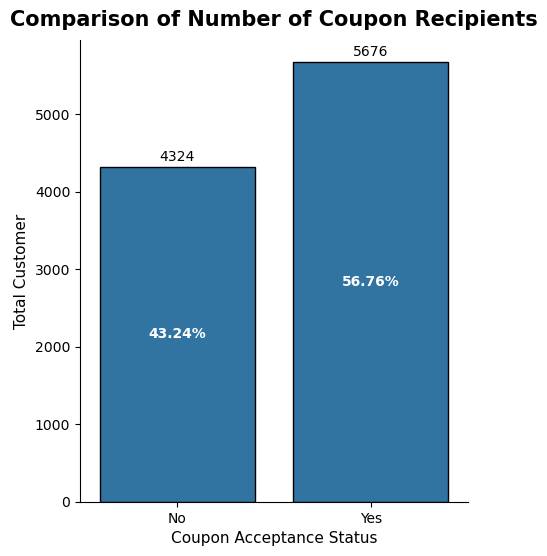

In [ ]:
data = {
    'Y': ['No', 'Yes'],
    'customers': [4324, 5676]}
df_y_gb = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(5, 6))
plt.title("Comparison of Number of Coupon Recipients", fontsize=15, color='black', weight='bold', pad=10)
sns.barplot(x='Y', y='customers', data=df_y_gb, edgecolor='black')
plt.xlabel('Coupon Acceptance Status', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.xticks([0, 1], ['No', 'Yes'])
bar_container = ax.containers[0]  # Get the bar container
plt.bar_label(bar_container, padding=2)  # Add padding to the first label
plt.bar_label(bar_container, ['43.24%', '56.76%'], label_type='center', color='white', weight='bold')
sns.despine()
plt.savefig('coupon_recipient.png')
plt.show()

Based on the calculation of the ratio value of the two target classes that received coupons and did not receive coupons, namely 57:43, there is no need to handle class imbalance because the target comparison value is not extreme.

# Feature Engineering

**Feature Selection**

In [ ]:
df = df.astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  object
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  object
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [ ]:
pip install dython

  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [ ]:
import pandas as pd
from dython.nominal import associations

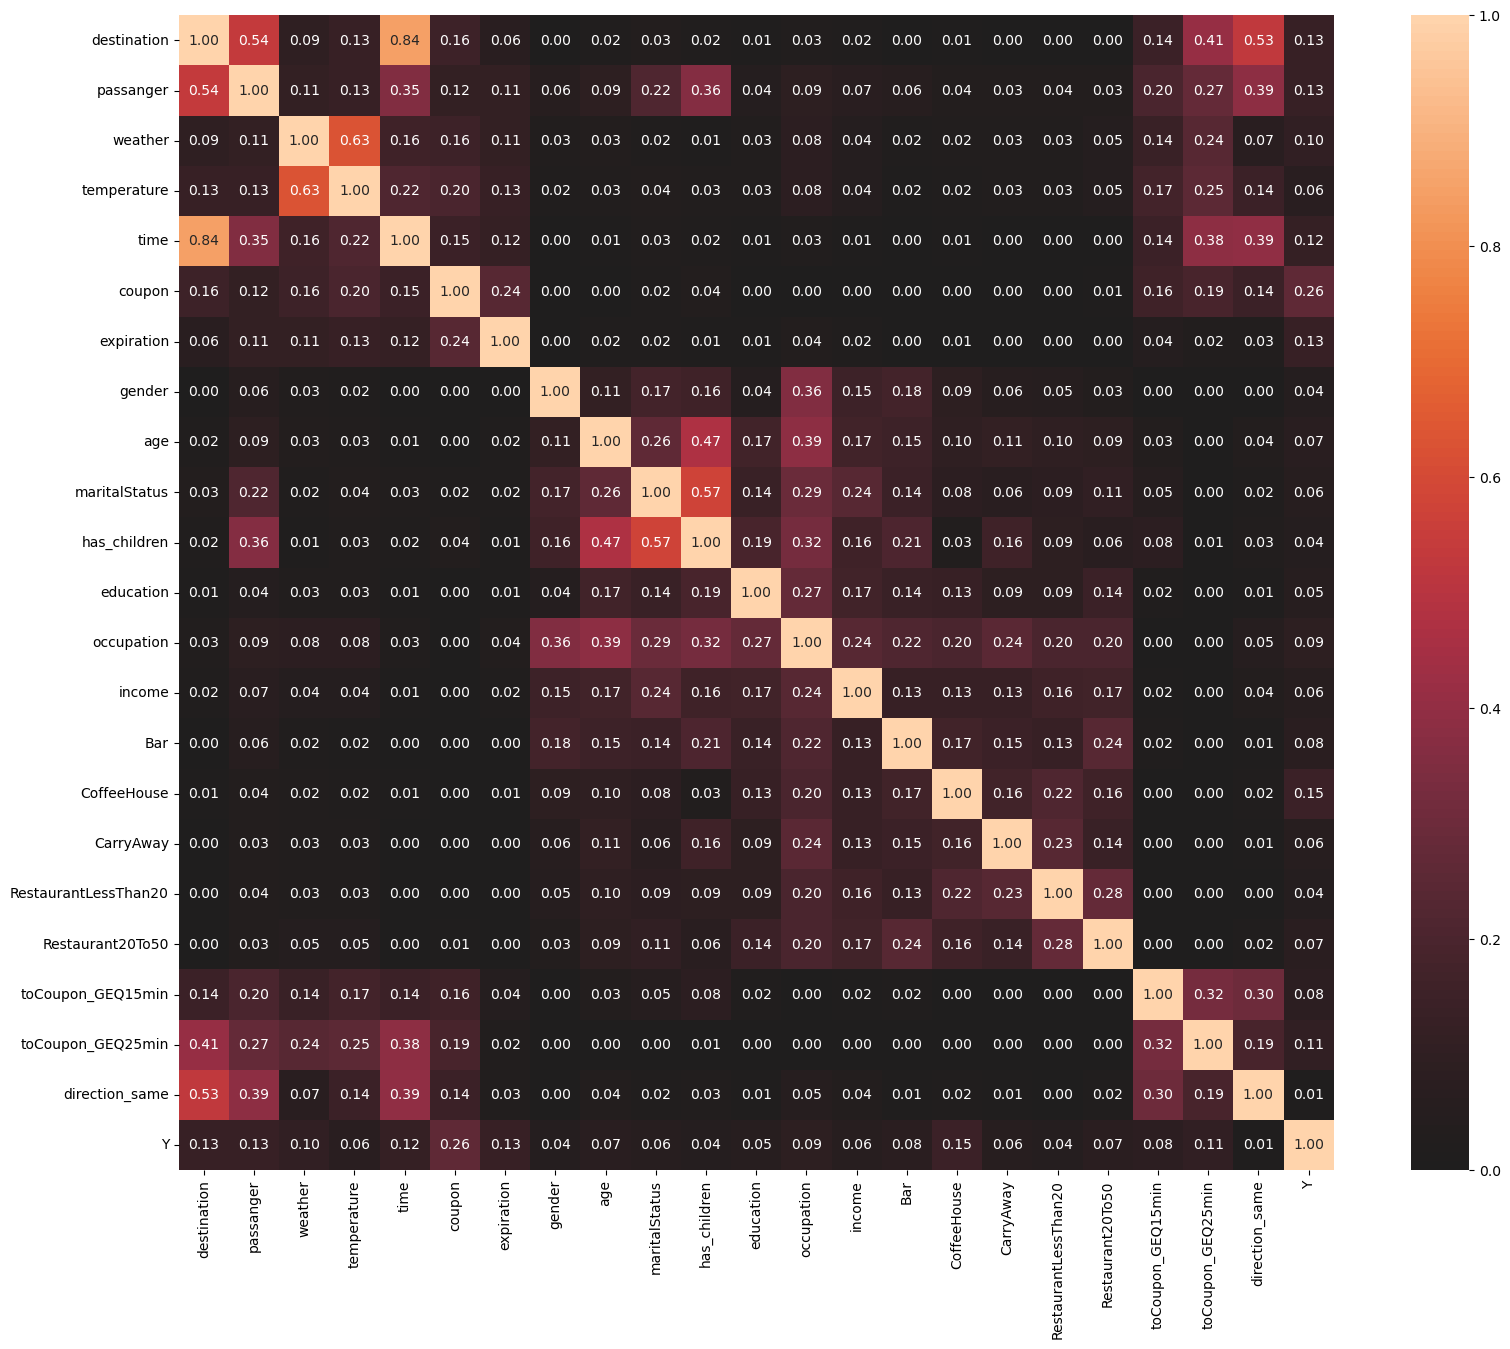

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
associations(df, nom_nom_assoc='cramer', ax=ax)
fig.savefig('fs_dython.png')

In [ ]:
pip install featurewiz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 672.2 kB/s eta 0:09:19
   ---------------------------------------- 0.8/376.0 MB 730.2 kB/s eta 0:08:34
   ---------

In [ ]:
import pandas as pd
from featurewiz import featurewiz

Imported lazytransform v1.18. 

Imported featurewiz 0.6.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (12610, 23)
    Single_Label Binary_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Binary_Classification problem 
    loading a random sample of 10000 rows into pandas for EDA
##########################################

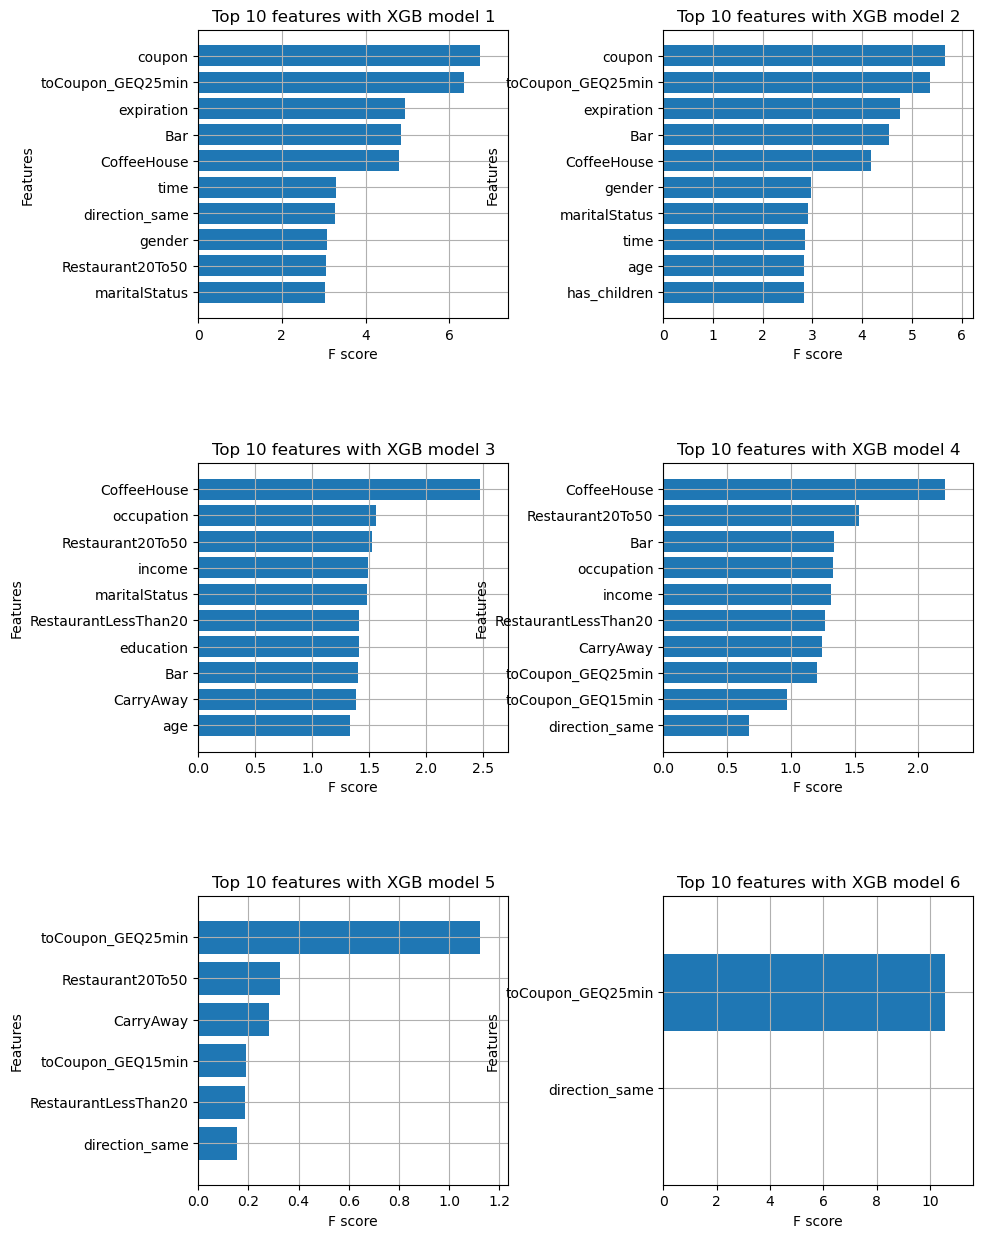

    Completed XGBoost feature selection in 6 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['coupon', 'occupation', 'CoffeeHouse', 'Bar', 'income', 'time', 'education', 'age', 'Restaurant20To50', 'toCoupon_GEQ25min', 'CarryAway', 'RestaurantLessThan20', 'toCoupon_GEQ15min', 'direction_same']
Total Time taken for featurewiz selection = 6 seconds
Output contains a list of 14 important features and a train dataframe


In [ ]:
features = featurewiz(df, target='Y', verbose=2)

In [ ]:
features

(['coupon',
  'occupation',
  'CoffeeHouse',
  'Bar',
  'income',
  'time',
  'education',
  'age',
  'Restaurant20To50',
  'toCoupon_GEQ25min',
  'CarryAway',
  'RestaurantLessThan20',
  'toCoupon_GEQ15min',
  'direction_same'],
        coupon  occupation  CoffeeHouse  Bar  income  time  education  age  \
 0           4          24            4    4       3     2          5    0   
 1           2          24            4    4       3     0          5    0   
 2           1          24            4    4       3     0          5    0   
 3           2          24            4    4       3     2          5    0   
 4           2          24            4    4       3     2          5    0   
 5           4          24            4    4       3     3          5    0   
 6           1          24            4    4       3     2          5    0   
 7           4          24            4    4       3     0          5    0   
 8           1          24            4    4       3     0          

**Feature Extraction**

In [ ]:
df_extract = df_dummy.copy()

In [ ]:
df_dummy['occupation'].value_counts()

Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science                  169


In [ ]:
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df_extract['occupation'] = occupation_list

In [ ]:
#checking occupation unique value
df_extract['occupation'].value_counts()

Professionals        4958
Unemployed           1861
Student              1575
Service and sales    1437
Technicians           804
Others                789
Crafts                693
Retired               493
Name: occupation, dtype: int64

In [ ]:
df_extract['passanger_destination'] = df_extract['passanger'].astype(str) + '-' + df_extract['destination'].astype(str)
df_extract['marital_hasChildren'] = df_extract['maritalStatus'].astype(str) + '-' + df_extract['has_children'].astype(str)
df_extract['temperature_weather'] = df_extract['temperature'].astype(str) + '-' + df_extract['weather'].astype(str)

In [ ]:
df_extract = df_extract.drop(columns=['passanger', 'destination', 'maritalStatus', 'has_children', 'temperature','weather'])

In [ ]:
df_extract.head()

time                 coupon expiration  gender    age  \
0   2PM        Restaurant(<20)         1d  Female  21-30   
1  10AM           Coffee House         2h  Female  21-30   
2  10AM  Carry out & Take away         2h  Female  21-30   
3   2PM           Coffee House         2h  Female  21-30   
4   2PM           Coffee House         1d  Female  21-30   

                  education  occupation           income    Bar CoffeeHouse  \
0  Some college - no degree  Unemployed  $37500 - $49999  never       never   
1  Some college - no degree  Unemployed  $37500 - $49999  never       never   
2  Some college - no degree  Unemployed  $37500 - $49999  never       never   
3  Some college - no degree  Unemployed  $37500 - $49999  never       never   
4  Some college - no degree  Unemployed  $37500 - $49999  never       never   

  CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ15min  \
0       1~3                  4~8              1~3                  0   
1       1~3                  4~8              1~3                  0   
2       1~3                  4~8              1~3                  1   
3       1~3                  4~8              1~3                  1   
4       1~3                  4~8              1~3                  1   

   toCoupon_GEQ25min  direction_same  Y      passanger_destination  \
0                  0               0  1      Alone-No Urgent Place   
1                  0               0  0  Friend(s)-No Urgent Place   
2                  0               0  1  Friend(s)-No Urgent Place   
3                  0               0  0  Friend(s)-No Urgent Place   
4                  0               0  0  Friend(s)-No Urgent Place   

   marital_hasChildren temperature_weather  
0  Unmarried partner-1            55-Sunny  
1  Unmarried partner-1            80-Sunny  
2  Unmarried partner-1            80-Sunny  
3  Unmarried partner-1            80-Sunny  
4  Unmarried partner-1            80-Sunny

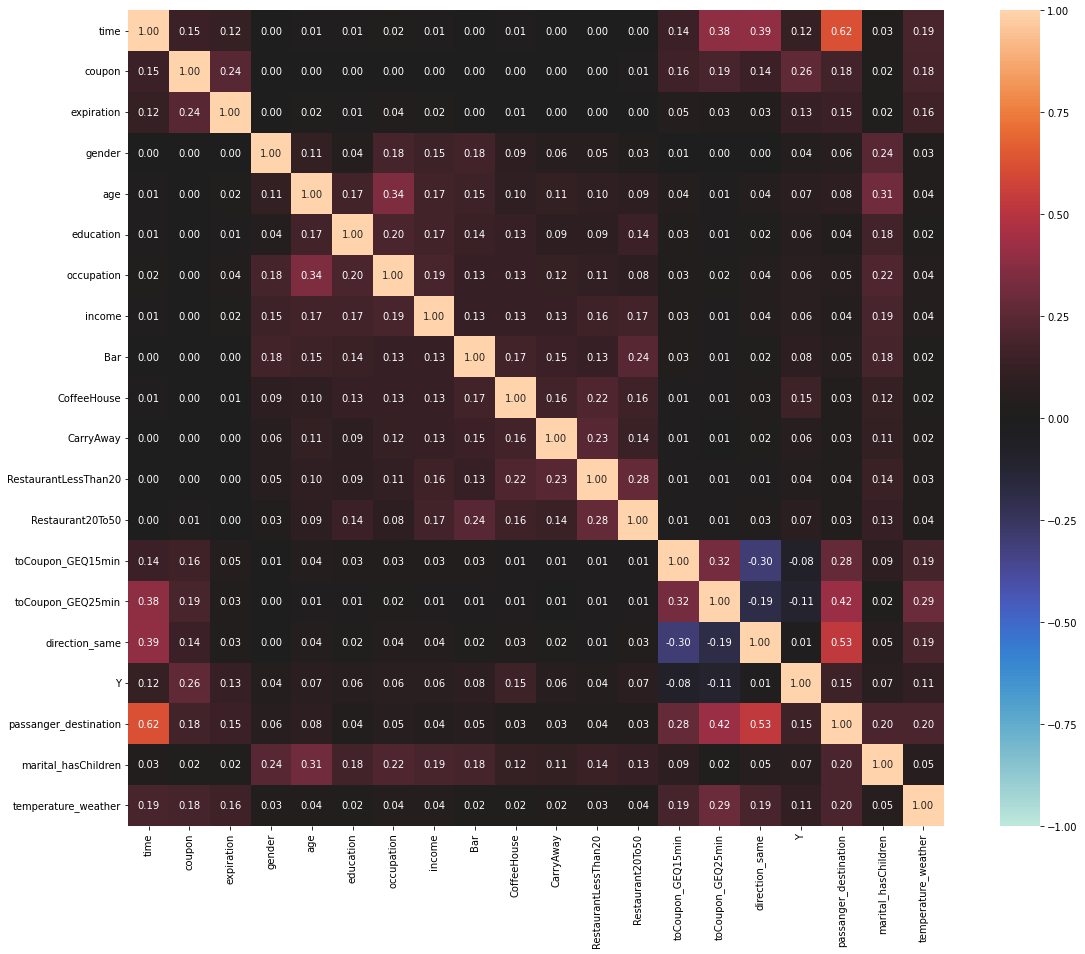

{'corr':                            time    coupon  expiration    gender       age  \
 time                   1.000000  0.145076    0.122493  0.000000  0.013941   
 coupon                 0.145076  1.000000    0.236730  0.000000  0.000000   
 expiration             0.122493  0.236730    1.000000  0.000000  0.021654   
 gender                 0.000000  0.000000    0.000000  1.000000  0.114030   
 age                    0.013941  0.000000    0.021654  0.114030  1.000000   
 education              0.011139  0.000000    0.008719  0.040181  0.169781   
 occupation             0.022336  0.000000    0.036855  0.183546  0.344254   
 income                 0.011982  0.000000    0.020355  0.151196  0.165255   
 Bar                    0.000000  0.000000    0.000000  0.175968  0.150146   
 CoffeeHouse            0.012379  0.000000    0.007679  0.092495  0.098032   
 CarryAway              0.000000  0.000000    0.000000  0.056911  0.113623   
 RestaurantLessThan20   0.002411  0.000000    0.000938  

In [ ]:
associations(df_extract, nom_nom_assoc='cramer', figsize=(20, 15))

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (12610, 20)
    Loaded train data. Shape = (12610, 20)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
################

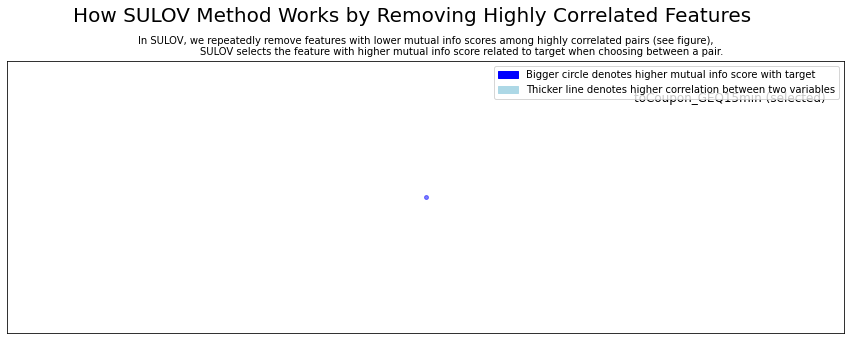

Time taken for SULOV method = 3 seconds
    Adding 16 categorical variables to reduced numeric variables  of 3
Final list of selected vars after SULOV = 19
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (12610, 20)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 19 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 19 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 15 variables...
            Time taken fo

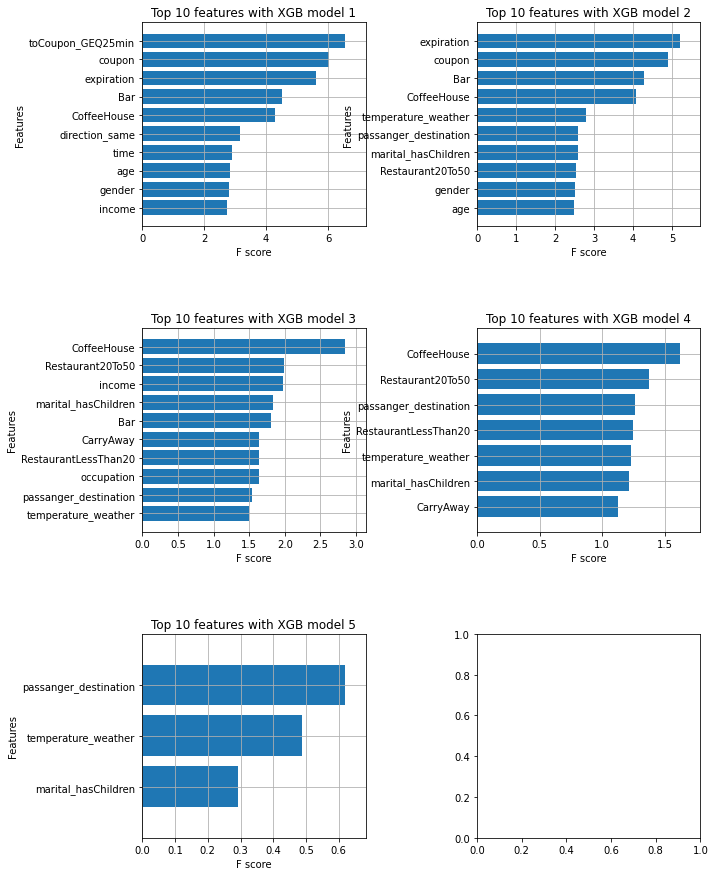

            Total time taken for XGBoost feature selection = 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 17 important features:
['toCoupon_GEQ25min', 'coupon', 'expiration', 'Bar', 'CoffeeHouse', 'direction_same', 'time', 'age', 'gender', 'income', 'temperature_weather', 'passanger_destination', 'marital_hasChildren', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'occupation']

    Time taken for feature selection = 6 seconds
    Reverted column names to original names given in train dataset


In [ ]:
features = featurewiz(df_extract, target='Y', verbose=2)

**Feature Addition**

**1. Operating System GPS mobil/handphone**

The operating system referred to here is the latest system update version of the cellphone which can affect the GPS feature and influence coupon acceptance.


**2. Design E-Coupon**

An attractive e-coupon design will increase the desire of drivers to accept the coupon.

**3. Platform Email User**

By knowing the user's email, promotions can be carried out for each user and can be identified to be more precise in providing coupons so that the coupons received will also increase.


**4. Internet Service Provider**

Differences in signals and internet service providers will affect the speed of opening GPS and with different internet service providers, the promotions given will also be different.

# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from dython.nominal import associations
import featurewiz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

Imported lazytransform v1.18. 

Imported featurewiz 0.6.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [ ]:
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

In [ ]:
df = df.fillna(df.mode().iloc[0])

In [ ]:
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df_dummy['age'] = age_list

In [ ]:
df_dummy['passanger_destination'] = df_dummy['passanger'].astype(str) + '-' + df_dummy['destination'].astype(str)
df_dummy['marital_hasChildren'] = df_dummy['maritalStatus'].astype(str) + '-' + df_dummy['has_children'].astype(str)
df_dummy['temperature_weather'] = df_dummy['temperature'].astype(str) + '-' + df_dummy['weather'].astype(str)

In [ ]:
df_dummy = df_dummy.drop(columns=['passanger', 'destination', 'maritalStatus', 'has_children', 'temperature','weather', 'Y'])

In [ ]:
df_dummy = pd.concat([df_dummy, df['Y']], axis = 1)

In [ ]:
pd.set_option('display.max_rows', None)
df_dummy.head()

time                 coupon expiration  gender    age  \
0   2PM        Restaurant(<20)         1d  Female  21-30   
1  10AM           Coffee House         2h  Female  21-30   
2  10AM  Carry out & Take away         2h  Female  21-30   
3   2PM           Coffee House         2h  Female  21-30   
4   2PM           Coffee House         1d  Female  21-30   

                  education  occupation           income    Bar CoffeeHouse  \
0  Some college - no degree  Unemployed  $37500 - $49999  never       never   
1  Some college - no degree  Unemployed  $37500 - $49999  never       never   
2  Some college - no degree  Unemployed  $37500 - $49999  never       never   
3  Some college - no degree  Unemployed  $37500 - $49999  never       never   
4  Some college - no degree  Unemployed  $37500 - $49999  never       never   

  CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ15min  \
0       1~3                  4~8              1~3                  0   
1       1~3                  4~8              1~3                  0   
2       1~3                  4~8              1~3                  1   
3       1~3                  4~8              1~3                  1   
4       1~3                  4~8              1~3                  1   

   toCoupon_GEQ25min  direction_same      passanger_destination  \
0                  0               0      Alone-No Urgent Place   
1                  0               0  Friend(s)-No Urgent Place   
2                  0               0  Friend(s)-No Urgent Place   
3                  0               0  Friend(s)-No Urgent Place   
4                  0               0  Friend(s)-No Urgent Place   

   marital_hasChildren temperature_weather  Y  
0  Unmarried partner-1            55-Sunny  1  
1  Unmarried partner-1            80-Sunny  0  
2  Unmarried partner-1            80-Sunny  1  
3  Unmarried partner-1            80-Sunny  0  
4  Unmarried partner-1            80-Sunny  0

In [ ]:
df_dummy.shape

(12610, 20)

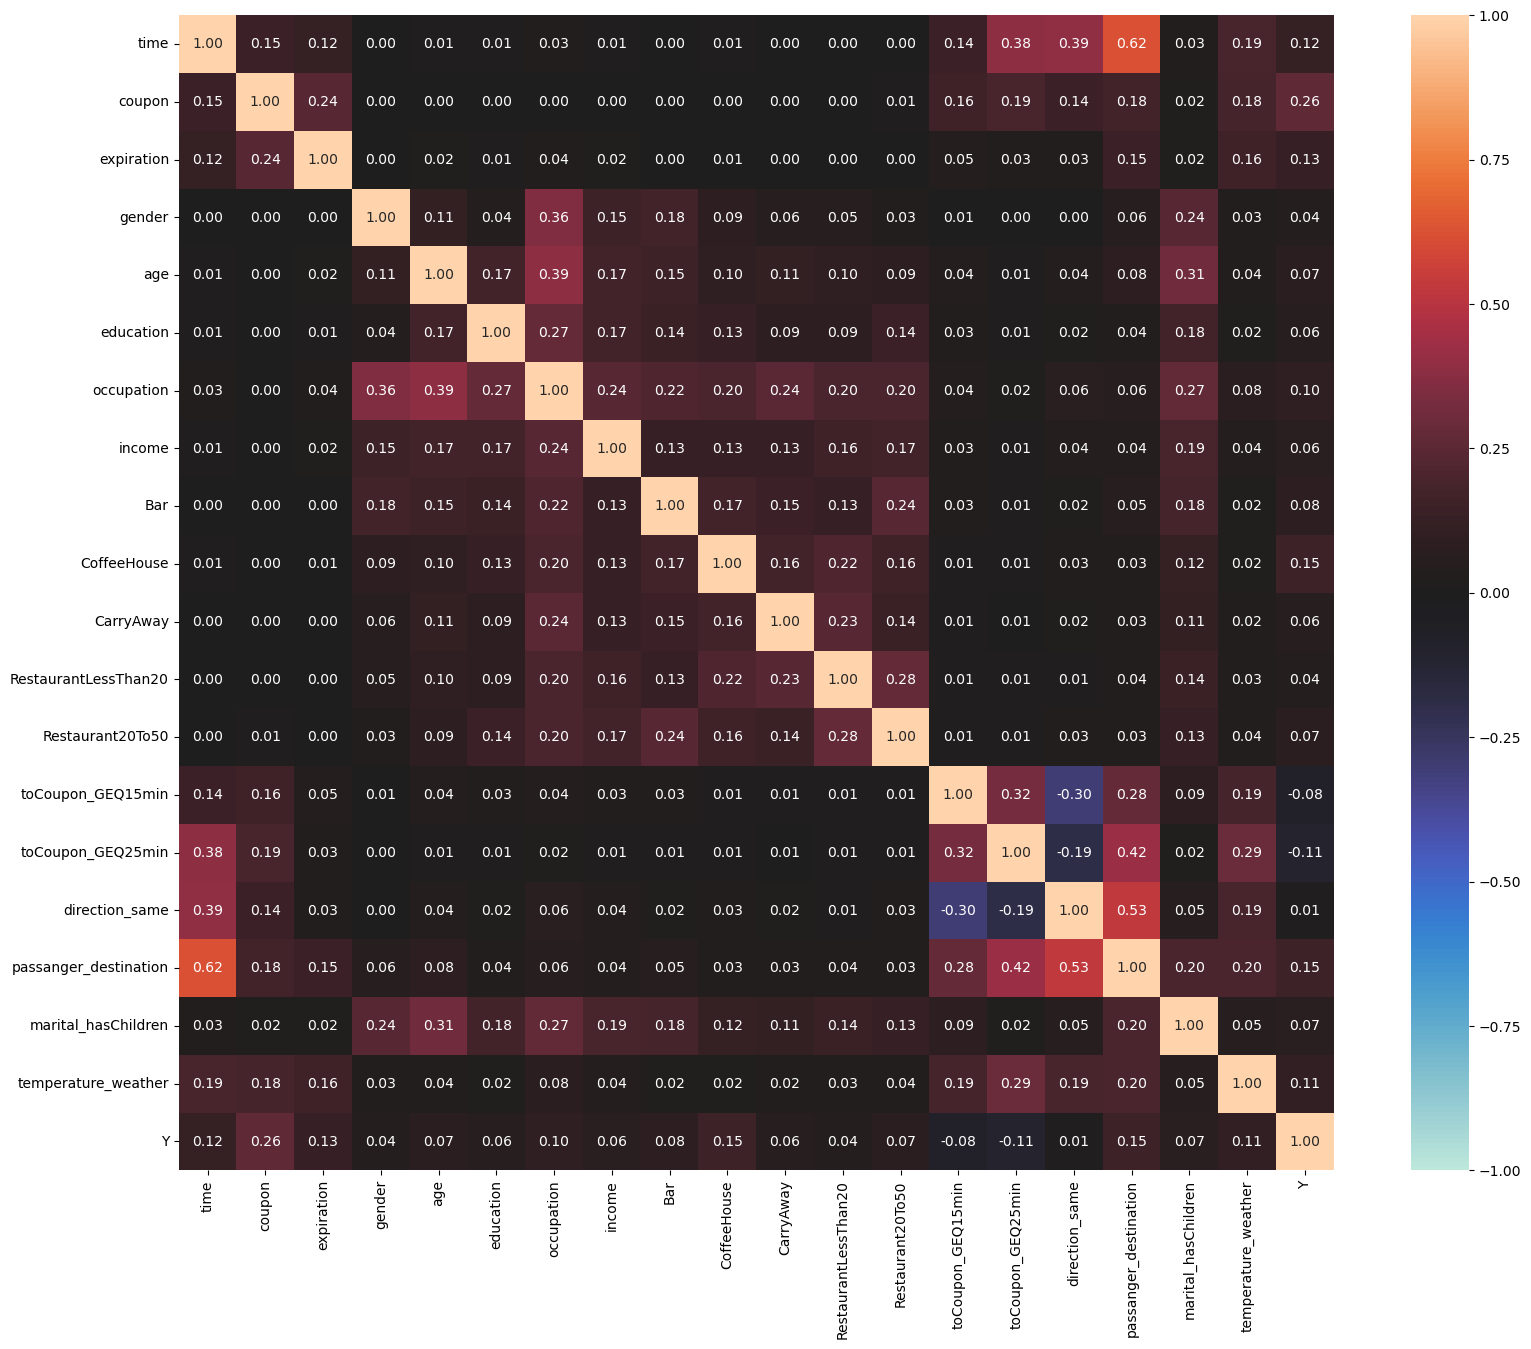

{'corr':                            time    coupon  expiration    gender       age  \
 time                   1.000000  0.145076    0.122493  0.000000  0.013941   
 coupon                 0.145076  1.000000    0.236730  0.000000  0.000000   
 expiration             0.122493  0.236730    1.000000  0.000000  0.021654   
 gender                 0.000000  0.000000    0.000000  1.000000  0.114030   
 age                    0.013941  0.000000    0.021654  0.114030  1.000000   
 education              0.011139  0.000000    0.008719  0.040181  0.169781   
 occupation             0.029085  0.000000    0.037034  0.355103  0.387739   
 income                 0.011982  0.000000    0.020355  0.151196  0.165255   
 Bar                    0.000000  0.000000    0.000000  0.175968  0.150146   
 CoffeeHouse            0.012379  0.000000    0.007679  0.092495  0.098032   
 CarryAway              0.000000  0.000000    0.000000  0.056911  0.113623   
 RestaurantLessThan20   0.002411  0.000000    0.000938  

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
associations(df_dummy, nom_nom_assoc='cramer', ax=ax)

In [ ]:
df_dummy = df_dummy.drop(columns=['gender', 'RestaurantLessThan20'])

In [ ]:
df_dummy.columns

Index(['time', 'coupon', 'expiration', 'age', 'education', 'occupation',
       'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'passanger_destination', 'marital_hasChildren', 'temperature_weather',
       'Y'],
      dtype='object')

In [ ]:
df_dummy[['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather']].nunique()

passanger_destination     8
marital_hasChildren      10
occupation               25
coupon                    5
temperature_weather       5
dtype: int64

In [ ]:
df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'income':{'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5, '$75000 - $87499':6, '$87500 - $99999':7, '$100000 or More':8},
                    'time':{'7AM':0, '10AM':1, '2PM':2, '6PM':3, '10PM':4}})

In [ ]:
df_le.head()

time                 coupon  expiration  age  education  occupation  \
0     2        Restaurant(<20)           1    1          2  Unemployed   
1     1           Coffee House           0    1          2  Unemployed   
2     1  Carry out & Take away           0    1          2  Unemployed   
3     2           Coffee House           0    1          2  Unemployed   
4     2           Coffee House           1    1          2  Unemployed   

   income  Bar  CoffeeHouse  CarryAway  Restaurant20To50  toCoupon_GEQ15min  \
0       3    0            0          2                 2                  0   
1       3    0            0          2                 2                  0   
2       3    0            0          2                 2                  1   
3       3    0            0          2                 2                  1   
4       3    0            0          2                 2                  1   

   toCoupon_GEQ25min  direction_same      passanger_destination  \
0                  0               0      Alone-No Urgent Place   
1                  0               0  Friend(s)-No Urgent Place   
2                  0               0  Friend(s)-No Urgent Place   
3                  0               0  Friend(s)-No Urgent Place   
4                  0               0  Friend(s)-No Urgent Place   

   marital_hasChildren temperature_weather  Y  
0  Unmarried partner-1            55-Sunny  1  
1  Unmarried partner-1            80-Sunny  0  
2  Unmarried partner-1            80-Sunny  1  
3  Unmarried partner-1            80-Sunny  0  
4  Unmarried partner-1            80-Sunny  0

In [ ]:
x = df_le.drop('Y', axis=1)
y = df_le.Y

# LEARNING CURVE N_COMPONENTS

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8827, 17)
(3783, 17)
(8827,)
(3783,)


In [ ]:
from category_encoders import HashingEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def get_score(model, x, y, x_test, y_test):
    model.fit(x, y)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    return score

logit = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [ ]:
n_components_list = [3, 5, 7, 8, 10, 12, 15, 17, 19, 20, 22, 24, 25, 27, 28, 29, 30]
n_components_list_str = [str(i) for i in n_components_list]

In [ ]:
fh_logit_scores = []

# Iterate over different n_components:
for n_components in n_components_list:
    
    hashing_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=n_components).fit(x_train, y_train)
    
    x_train_hashing = hashing_enc.transform(x_train.reset_index(drop=True))
    x_test_hashing = hashing_enc.transform(x_test.reset_index(drop=True))
    
    fe_logit_score = get_score(logit, x_train_hashing, y_train, x_test_hashing, y_test)
    fh_logit_scores.append(fe_logit_score)

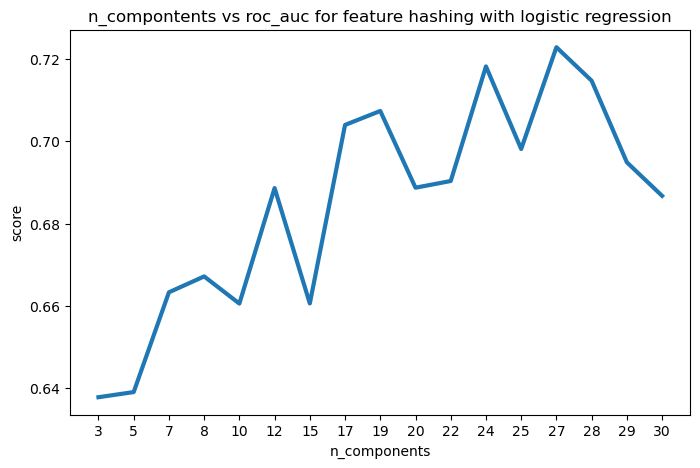

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(n_components_list_str, fh_logit_scores, linewidth=3)
plt.title('n_compontents vs roc_auc for feature hashing with logistic regression')
plt.xlabel('n_components')
plt.ylabel('score')
plt.show;

In [ ]:
hashing_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=27).fit(x_train, y_train)
x_train_hashing = hashing_enc.transform(x_train.reset_index(drop=True))
x_test_hashing = hashing_enc.transform(x_test.reset_index(drop=True))

In [ ]:
hashing_logit_score = get_score(logit, x_train_hashing, y_train, x_test_hashing, y_test)
print('Logistic Regression score with feature hashing:', hashing_logit_score)

Logistic Regression score with feature hashing: 0.722845055015582


# DATA SPLITTING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
hashing_ros_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=27).fit(x_train, y_train)
x_train_hashing = hashing_ros_enc.transform(x_train.reset_index(drop=True))
x_test_hashing = hashing_ros_enc.transform(x_test.reset_index(drop=True))

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
x_sm_train_hashing, y_sm_train = sm.fit_resample(x_train_hashing, y_train)

In [ ]:
print(x_sm_train_hashing.shape)
print(x_test_hashing.shape)
print(y_sm_train.shape)
print(y_test.shape)

(10056, 39)
(3783, 39)
(10056,)
(3783,)


In [ ]:
y_sm_ri = y_sm_train.reset_index()
y_sm_ri.head()

index  Y
0      0  0
1      1  1
2      2  0
3      3  0
4      4  1

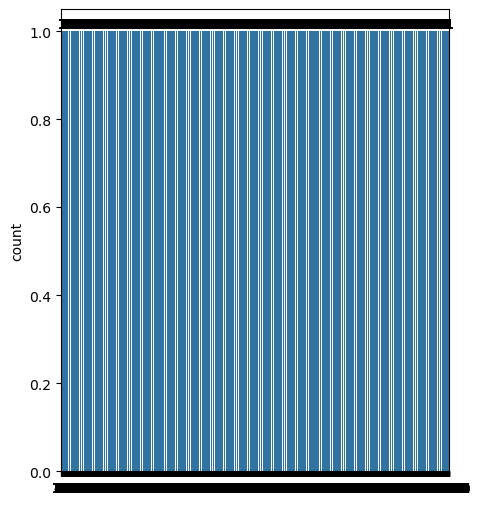

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.countplot(df_le['Y'])
plt.bar_label(ax.containers[0]);

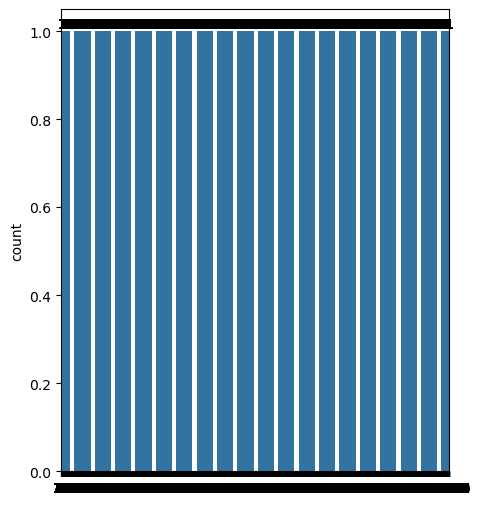

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.countplot(y_sm_ri['Y'])
plt.bar_label(ax.containers[0]);

In [ ]:
hashing_sm_logit_score = get_score(logit, x_sm_train_hashing, y_sm_train, x_test_hashing, y_test)
print('SMOTE Logistic Regression score with feature hashing:', hashing_sm_logit_score)

SMOTE Logistic Regression score with feature hashing: 0.7224258994946847


In [ ]:
pd.set_option('display.max_columns', None)
x_sm_train_hashing.head()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
0      0      0      0      0      0      0      0      0      0      0   
1      1      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      1      1      0      0      0      0      0      0      0      0   
4      1      0      0      0      0      0      0      0      0      0   

   col_10  col_11  col_12  col_13  col_14  col_15  col_16  col_17  col_18  \
0       0       1       0       0       0       0       0       0       0   
1       0       1       1       0       0       0       0       0       0   
2       0       0       1       0       0       0       1       0       1   
3       0       0       0       0       0       0       1       0       0   
4       0       1       1       0       0       0       0       0       0   

   col_19  col_20  col_21  col_22  col_23  col_24  col_25  col_26  time  \
0       0       1       0       0       0       1       1       1     3   
1       1       1       0       0       0       0       0       0     3   
2       1       0       0       0       0       1       0       0     3   
3       0       1       0       0       1       0       0       0     0   
4       1       1       0       0       0       0       0       0     0   

   expiration  age  education  income  Bar  CoffeeHouse  CarryAway  \
0           0    1          4       6    0            0          2   
1           0    1          2       2    0            1          2   
2           0    2          2       8    1            1          4   
3           1    2          3       7    0            3          3   
4           0    2          2       2    0            4          3   

   Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  
0                 2                  1                  0               0  
1                 1                  1                  1               0  
2                 2                  1                  0               0  
3                 1                  1                  1               0  
4                 1                  1                  0               1

# MODEL TESTING

In [ ]:
def eval(model):
    y_pred = model.predict(x_test_hashing)
    y_pred_proba = model.predict_proba(x_test_hashing)
    y_pred_train = model.predict(x_sm_train_hashing)
    y_pred_train_proba = model.predict_proba(x_sm_train_hashing)

    print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
    print('precision (test): '+ str(precision_score(y_test, y_pred)))
    print('recall (test): '+ str(recall_score(y_test, y_pred)))
    print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
    print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))

**Logistic Regression**

In [ ]:
logit = LogisticRegression(random_state=42, class_weight='balanced')
logit.fit(x_sm_train_hashing, y_sm_train)
eval(logit)

accuracy (test): 0.6687813904308749
precision (test): 0.6892826274848747
recall (test): 0.7491780178487553
roc-auc (train-proba): 0.7826749755862002
roc-auc (test-proba): 0.7224258994946847


**Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(x_sm_train_hashing, y_sm_train)
eval(rf)

accuracy (test): 0.7430610626486915
precision (test): 0.7642759250799451
recall (test): 0.7858149365899484
roc-auc (train-proba): 0.9999972310985292
roc-auc (test-proba): 0.8096007344876959


[Text(0.5842568649948785, 0.9852941176470589, 'col_20 <= 0.5\ngini = 0.5\nsamples = 6359\nvalue = [5018, 5038]'),
 Text(0.3108335347761622, 0.9558823529411765, 'col_16 <= 0.5\ngini = 0.49\nsamples = 3406\nvalue = [2402, 2997]'),
 Text(0.12661841831555237, 0.9264705882352942, 'CoffeeHouse <= 0.5\ngini = 0.48\nsamples = 2722\nvalue = [1797, 2561]'),
 Text(0.05289472829968188, 0.8970588235294118, 'col_4 <= 0.5\ngini = 0.5\nsamples = 663\nvalue = [560, 496]'),
 Text(0.024190092839057327, 0.8676470588235294, 'CarryAway <= 1.5\ngini = 0.46\nsamples = 470\nvalue = [483, 272]'),
 Text(0.011147179120950465, 0.8382352941176471, 'toCoupon_GEQ15min <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [109, 92]'),
 Text(0.006907745244432903, 0.8088235294117647, 'income <= 7.5\ngini = 0.43\nsamples = 60\nvalue = [70, 31]'),
 Text(0.0055054210218788546, 0.7794117647058824, 'col_25 <= 0.5\ngini = 0.4\nsamples = 54\nvalue = [64, 25]'),
 Text(0.003947282996818802, 0.75, 'col_18 <= 0.5\ngini = 0.48\nsamples = 34\n

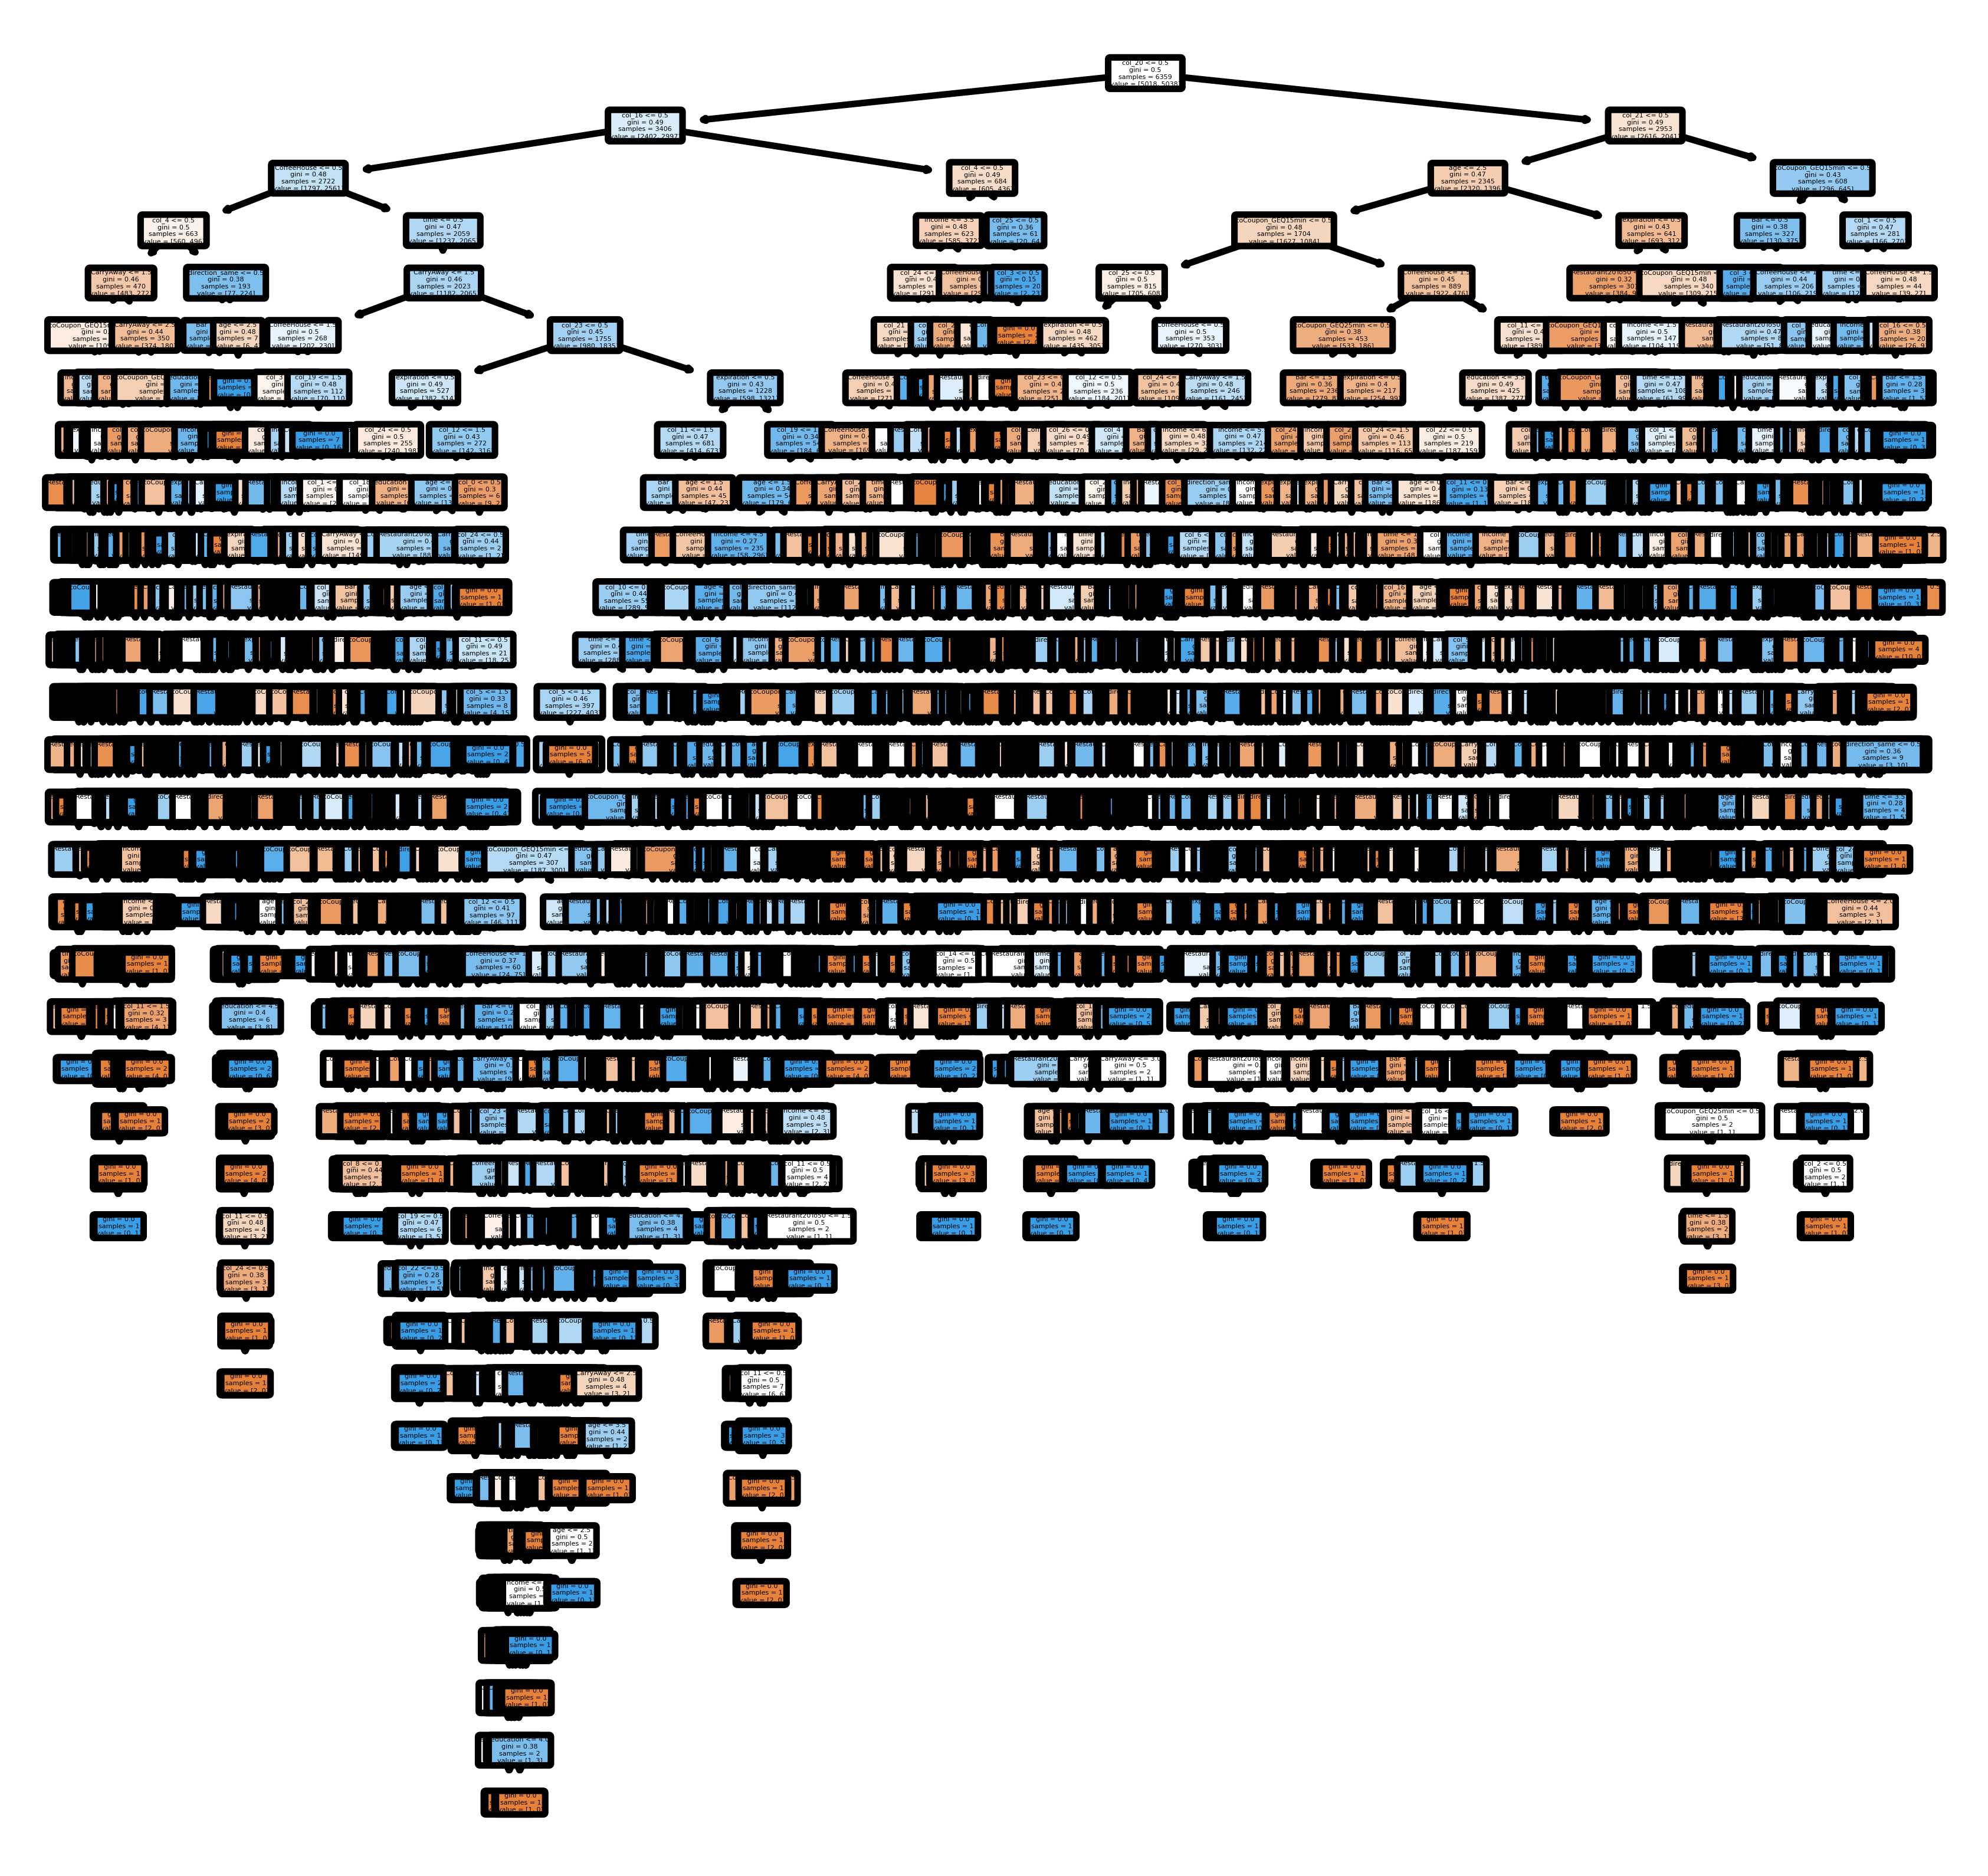

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=800)
estimator = rf.estimators_[0]
tree.plot_tree(estimator,
                feature_names = list(x_sm_train_hashing.columns),
                rounded=True, proportion=False, precision=2, filled=True)

#fig.savefig('rf_individualtree.png')

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier().fit(x_sm_train_hashing, y_sm_train)
eval(knn)

accuracy (test): 0.6468411313772139
precision (test): 0.7013712544438802
recall (test): 0.6486613433536872
roc-auc (train-proba): 0.9005268191049771
roc-auc (test-proba): 0.6954984230551439


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(x_sm_train_hashing, y_sm_train)
eval(dt)

accuracy (test): 0.6605868358445678
precision (test): 0.6984499765147957
recall (test): 0.6984499765147957
roc-auc (train-proba): 0.9999990111066176
roc-auc (test-proba): 0.6550202393048606


**CatBoost**

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier(random_state=42, verbose=False).fit(x_sm_train_hashing, y_sm_train)
eval(cb)

accuracy (test): 0.7449114459423738
precision (test): 0.7586666666666667
recall (test): 0.8017848755284172
roc-auc (train-proba): 0.9440333021317694
roc-auc (test-proba): 0.8193652690461599


**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(random_state=42, use_label_encoder=False).fit(x_sm_train_hashing, y_sm_train)
eval(xg)

accuracy (test): 0.7412106793550093
precision (test): 0.7580789946140036
recall (test): 0.7933302019727572
roc-auc (train-proba): 0.9756452964433381
roc-auc (test-proba): 0.8154219129735449


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab = AdaBoostClassifier(random_state=42).fit(x_sm_train_hashing, y_sm_train)
eval(ab)

accuracy (test): 0.675389902194026
precision (test): 0.7175277643650411
recall (test): 0.6979802724283701
roc-auc (train-proba): 0.7717032232861133
roc-auc (test-proba): 0.7276677573418953


# MODEL TUNING HYPERPARAMETER

In [ ]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [ ]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': plusNone(np.array(range(1,x_sm_train_hashing.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    },
    {# LogisticRegression
        'penalty' : ['l1', 'l2'],
        'C' : [0.0001, 0.001, 0.1, 0.02, 0.03, 0.01],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

In [ ]:
models = [DecisionTreeClassifier(random_state=42, class_weight='balanced'),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=42, class_weight='balanced'),
          XGBClassifier(random_state=42, use_label_encoder=False),
          AdaBoostClassifier(random_state=42),
          CatBoostClassifier(random_state=42, verbose = False),
          LogisticRegression(random_state=42, class_weight='balanced')]

names = ['Decision Tree',
         'KNN',
         'Random Forest',
         'XGBoost',
         'AdaBoost',
         'CatBoost',
         'LogisticRegression']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def model_score_tune_rscv(model, name, params, n_iter = 10):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = 0, scoring = 'accuracy', random_state = 42, n_iter = n_iter)
    RSCV.fit(x_sm_train_hashing, y_sm_train)
    y_pred = RSCV.predict(x_test_hashing)
    y_pred_proba = RSCV.predict_proba(x_test_hashing)
    y_pred_train = RSCV.predict(x_sm_train_hashing)
    y_pred_train_proba = RSCV.predict_proba(x_sm_train_hashing)

    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
    print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
    print('precision (test): '+ str(precision_score(y_test, y_pred)))
    print('recall (test): '+ str(recall_score(y_test, y_pred)))
    print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
    print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))
    print(RSCV.best_params_)
    print('\n')

In [ ]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i])

Decision Tree:
accuracy (test): 0.4372191382500661
precision (test): 0.0
recall (test): 0.0
roc-auc (train-proba): 0.5
roc-auc (test-proba): 0.5
{'min_samples_split': 0.1, 'min_samples_leaf': 0.30000000000000004, 'max_features': 4, 'max_depth': None}


KNN:
accuracy (test): 0.6468411313772139
precision (test): 0.6935090287945339
recall (test): 0.6674495068107092
roc-auc (train-proba): 0.9993038981702466
roc-auc (test-proba): 0.6438819480849194
{'p': 2, 'n_neighbors': 1, 'leaf_size': 11, 'algorithm': 'kd_tree'}


Random Forest:
accuracy (test): 0.7412106793550093
precision (test): 0.7597109304426377
recall (test): 0.7900422733677783
roc-auc (train-proba): 0.9999987737722058
roc-auc (test-proba): 0.8093654564734254
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


XGBoost:
accuracy (test): 0.7451757864128998
precision (test): 0.7606263982102909
recall (test): 0.7984969469234382
roc-auc (train-proba): 0.997

In [ ]:
xg = XGBClassifier(tree_method= 'auto', min_child_weight= 6, max_depth= 60, reg_lambda = 0.6000000000000001 , gamma= 0.4, eta= 0.3535353535353536, colsample_bytree= 0.6000000000000001, alpha= 0.6000000000000001, random_state=42, use_label_encoder=False)
xg.fit(x_sm_train_hashing, y_sm_train)
y_pred = xg.predict(x_test_hashing)
y_pred_proba = xg.predict_proba(x_test_hashing)
y_pred_train = xg.predict(x_sm_train_hashing)
y_pred_train_proba = xg.predict_proba(x_sm_train_hashing)

print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
print('precision (test): '+ str(precision_score(y_test, y_pred)))
print('recall (test): '+ str(recall_score(y_test, y_pred)))
print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))

accuracy (test): 0.7451757864128998
precision (test): 0.7606263982102909
recall (test): 0.7984969469234382
roc-auc (train-proba): 0.9977917615213198
roc-auc (test-proba): 0.8180294238088286


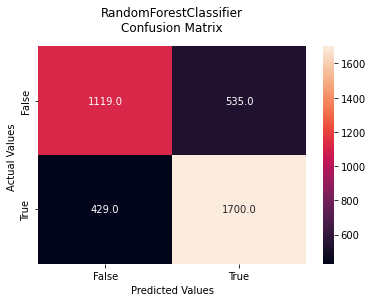

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt='.1f')

plt.title('RandomForestClassifier\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# FEATURE IMPORTANCES

Text(0.5, 1.0, 'feature importance score')

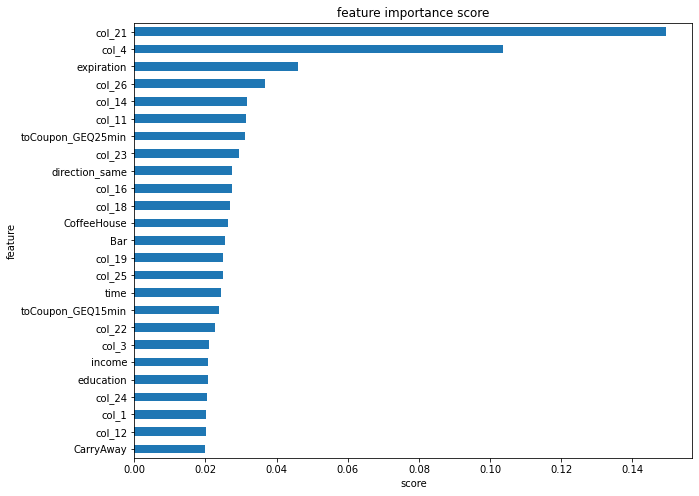

In [ ]:
feat_importances = pd.Series(xg.feature_importances_, index=x_sm_train_hashing.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
feat_importances.nlargest(25)

col_21               0.149372
col_4                0.103593
expiration           0.046006
col_26               0.036618
col_14               0.031772
col_11               0.031478
toCoupon_GEQ25min    0.031150
col_23               0.029331
direction_same       0.027545
col_16               0.027415
col_18               0.026792
CoffeeHouse          0.026276
Bar                  0.025393
col_19               0.025036
col_25               0.024910
time                 0.024477
toCoupon_GEQ15min    0.023736
col_22               0.022772
col_3                0.021069
income               0.020808
education            0.020580
col_24               0.020300
col_1                0.020166
col_12               0.020057
CarryAway            0.020000
dtype: float32

In [ ]:
x_fi_train = x_sm_train_hashing[['col_21', 'col_4', 'expiration', 'col_26', 'col_14', 'col_11', 'toCoupon_GEQ25min', 'col_23', 'direction_same', 'col_16', 'col_18', 'CoffeeHouse',
                           'Bar', 'col_19', 'col_25', 'time', 'toCoupon_GEQ15min', 'col_22', 'col_3', 'income', 'education', 'col_24', 'col_1', 'col_12', 'CarryAway']]
x_fi_test = x_test_hashing[['col_21', 'col_4', 'expiration', 'col_26', 'col_14', 'col_11', 'toCoupon_GEQ25min', 'col_23', 'direction_same', 'col_16', 'col_18', 'CoffeeHouse',
                           'Bar', 'col_19', 'col_25', 'time', 'toCoupon_GEQ15min', 'col_22', 'col_3', 'income', 'education', 'col_24', 'col_1', 'col_12', 'CarryAway']]
y_fi_train = y_sm_train
y_fi_test = y_test

In [ ]:
print(x_fi_train.shape)
print(x_fi_test.shape)
print(y_fi_train.shape)
print(y_fi_test.shape)

(10056, 25)
(3783, 25)
(10056,)
(3783,)


In [ ]:
xg = XGBClassifier(tree_method= 'auto', min_child_weight= 6, max_depth= 60, reg_lambda = 0.6000000000000001 , gamma= 0.4, eta= 0.3535353535353536, colsample_bytree= 0.6000000000000001, alpha= 0.6000000000000001, random_state=42, use_label_encoder=False)
xg.fit(x_fi_train, y_fi_train)
y_pred = xg.predict(x_fi_test)
y_pred_proba = xg.predict_proba(x_fi_test)
y_pred_train = xg.predict(x_fi_train)
y_pred_train_proba = xg.predict_proba(x_fi_train)

print('accuracy (test): '+ str(accuracy_score(y_fi_test, y_pred)))
print('precision (test): '+ str(precision_score(y_fi_test, y_pred)))
print('recall (test): '+ str(recall_score(y_fi_test, y_pred)))
print('roc-auc (train-proba): '+str(roc_auc_score(y_fi_train, y_pred_train_proba[:,1])))
print('roc-auc (test-proba): '+str(roc_auc_score(y_fi_test, y_pred_proba[:,1])))

accuracy (test): 0.7272006344171292
precision (test): 0.7460744728577837
recall (test): 0.7811178957256928
roc-auc (train-proba): 0.9934250456789632
roc-auc (test-proba): 0.8001255762678461


# GITHUB

https://github.com/Muhammed-Abinsaj/In-Vehicle-Coupon-Recommendation/tree/main/Final%20Project

# Findings

* The calculation of metrics used for this dataset is accuracy. This is because the data is balanced, then the initial goal of creating this prediction model is to increase coupon acceptance, so that model accuracy becomes the main metrics. 

* The best model produced from the modeling above is the XGBoost model with an accuracy level produced by the model of 75%, but the model is not the best-fit because the ROC-AUC gap is 0.16. 

* It uses hash encoding, the top features in this dataset are col_21, col_4 the result of hash encoding. At the top no. 3, there is the expiration feature. This feature has a major contribution to the performance of the XGBoost model prediction, based on EDA drivers/customers tend to accept coupons if the coupon expiration is 1d/1 day, compared to 2h/2 hours. The business recommendation that can be applied is that when creating a coupon campaign, it is recommended to give coupons to drivers/customers that are valid for at least 1 day before they expire, this type of coupon is more widely accepted by drivers/customers. So that the coupon acceptance rate will be high.

* After re-modeling using the selection feature, the model value decreases. This is done to the XGBoost model. The accuracy value which was previously 74% decreased to 73%